## <a id='toc1_1_'></a>[Cleaning Small Fragments (Manually)](#toc0_)

In this notebook, we're going to clean some small fragments manually, after we have curated the dataset of SMILES and approval date, we can perform the manual curation of salt+base; We are curating the **MANUAL CURATION SALT+BASE N=359** dataset as showed below in the flowchart


**Table of contents**<a id='toc0_'></a>    
- [Cleaning Small Fragments (Manually)](#toc1_1_)    
    - [Importing the libraries](#toc1_1_1_)    
    - [Importing the dataset](#toc1_1_2_)    
    - [Generating MOL structures](#toc1_1_3_)    
    - [Removing unwanted structures](#toc1_1_4_)    
    - [Saving the output](#toc1_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

![flowchard_pre_cleaning.jpeg](../imgs/flowcharts/pre_cleaning.jpeg)

### <a id='toc1_1_1_'></a>[Importing the libraries](#toc0_)

In [12]:
import pandas as pd
import session_info

from rdkit import Chem, rdBase
from rdkit.Chem import Draw, Descriptors, PandasTools, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.SaltRemover import SaltRemover, InputFormat
from rdkit.Chem import rdmolops # To clean the structures

from IPython.display import HTML

In [13]:
# Defining a function to print all structures in mol correctly
def show_df(df):
    return HTML(df.to_html(notebook=True))

### <a id='toc1_1_2_'></a>[Importing the dataset](#toc0_)

In [14]:
manual_fragments = pd.read_csv('../data/pre_manual_curation/manual_curation_fragments.csv')
manual_fragments.head(10)

pref_name                                             SMILES  \
0         AMMONIUM LACTATE                                      CC(O)C(=O)O.N   
1                SEVELAMER                                     C=CCN.ClCC1CO1   
2                    MESNA                             O=S(=O)([O-])CCS.[Na+]   
3           MERCAPTOPURINE                            O.S=c1[nH]cnc2nc[nH]c12   
4                CARBACHOL                         C[N+](C)(C)CCOC(N)=O.[Cl-]   
5         ALUMINUM ACETATE            CC(=O)[O-].CC(=O)[O-].CC(=O)[O-].[Al+3]   
6  AMIFAMPRIDINE PHOSPHATE                              Nc1ccncc1N.O=P(O)(O)O   
7          LITHIUM CITRATE  O=C([O-])CC(O)(CC(=O)[O-])C(=O)[O-].[Li+].[Li+...   
8      SEVELAMER CARBONATE                             C=CCN.ClCC1CO1.O=C(O)O   
9    CYSTEAMINE BITARTRATE                          NCCS.O=C(O)C(O)C(O)C(=O)O   

  molecule_chembl_id  first_approval   molecule_type  \
0      CHEMBL1200747          1985.0  Small molecule   
1      CHEMBL1201798          2007.0  Small molecule   
2          CHEMBL975          1988.0  Small molecule   
3      CHEMBL1200751          1953.0  Small molecule   
4           CHEMBL14          1972.0  Small molecule   
5      CHEMBL1201015          1976.0  Small molecule   
6      CHEMBL3301611          2018.0  Small molecule   
7      CHEMBL1201170          1980.0  Small molecule   
8      CHEMBL1201799          2007.0  Small molecule   
9      CHEMBL2062263          1994.0  Small molecule   

           indication_class  polymer_flag  withdrawn_flag  inorganic_flag  \
0    Antipruritic (topical)             0           False               0   
1                       NaN             0           False               0   
2         Detoxifying Agent             0           False               0   
3            Antineoplastic             0           False               0   
4  Cholinergic (ophthalmic)             0           False               0   
5                Astringent             0           False               0   
6                       NaN             0           False               0   
7                 Antimanic             0           False               0   
8                       NaN             0           False               0   
9                       NaN             0           False               0   

   therapeutic_flag  natural_product   oral  parenteral  topical          mw  
0              True                0  False       False     True  107.058243  
1              True                0   True       False    False  149.060742  
2              True                0   True        True    False  163.957780  
3              True                0   True       False    False  170.026232  
4              True                0  False        True    False  182.082205  
5              True                0  False       False     True  204.021452  
6              True                0   True       False    False  207.040892  
7              True                0   True       False    False  210.051541  
8              True                0   True       False    False  211.061136  
9              True                0   True       False    False  227.046358

### <a id='toc1_1_3_'></a>[Generating MOL structures](#toc0_)

[10:45:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:45:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:45:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:45:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:45:34] WARNING: not removing hydrogen atom without neighbors
[10:45:34] WARNING: not removing hydrogen atom without neighbors
[10:45:34] WARNING: not removing hydrogen atom without neighbors
[10:45:34] WARNING: not removing hydrogen atom without neighbors



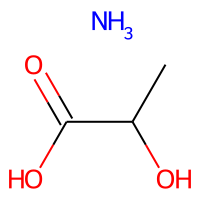
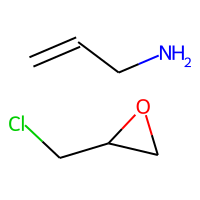
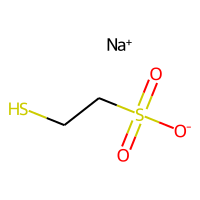
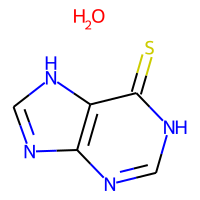
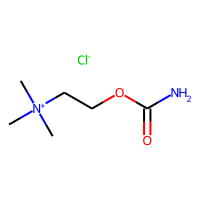

In [15]:
PandasTools.AddMoleculeColumnToFrame(manual_fragments, smilesCol='SMILES')
show_df(manual_fragments.head(5))

In [16]:
# We do this function so we can keep only the largest fragments;
def keep_largest_fragment(mol):
    frags = rdmolops.GetMolFrags(mol, asMols=True)
    largest_mol = max(frags, key=lambda x: x.GetNumAtoms())
    return largest_mol


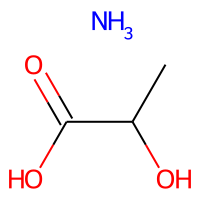
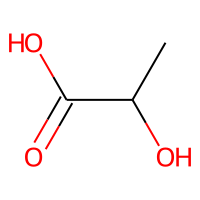
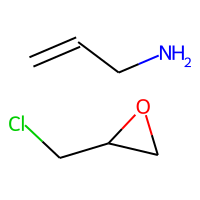
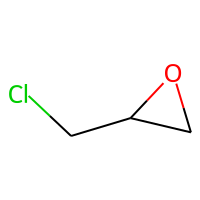
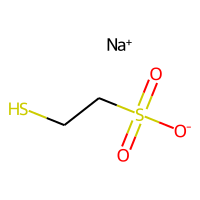
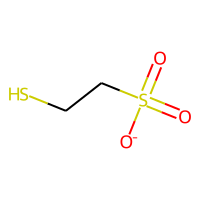
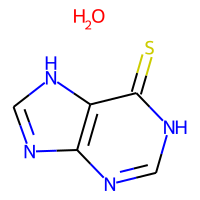
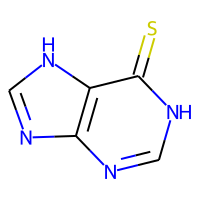
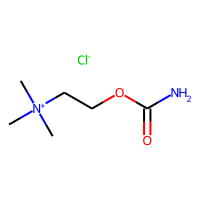
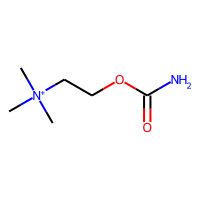
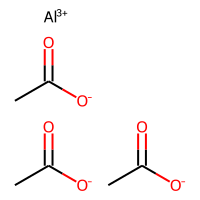
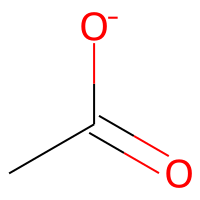
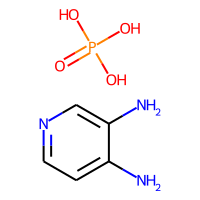
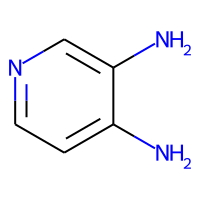
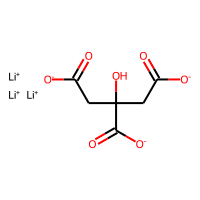
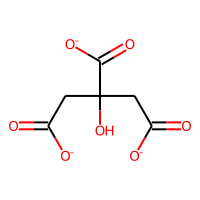
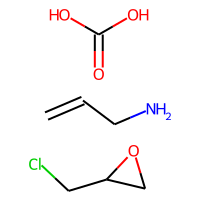
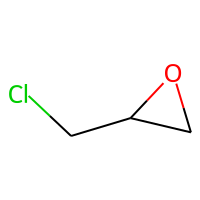
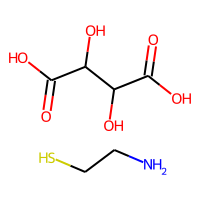
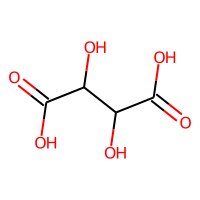
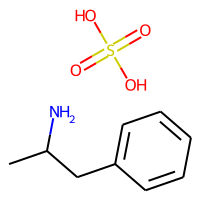
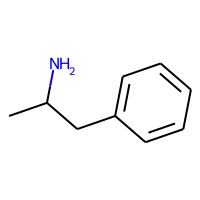
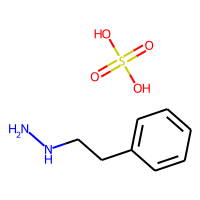
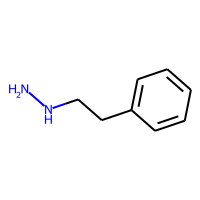
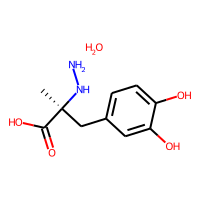
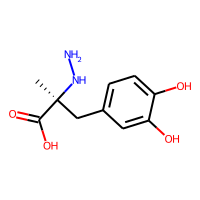
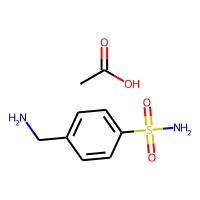
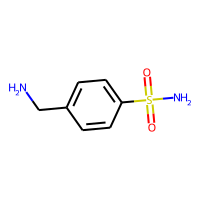
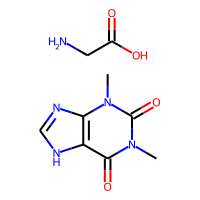
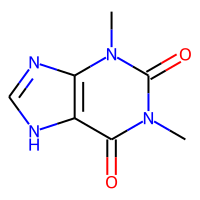
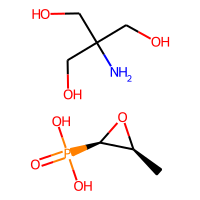
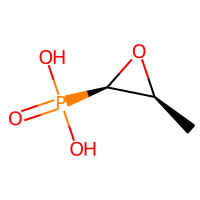
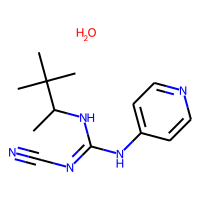
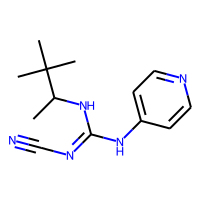
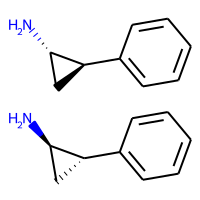
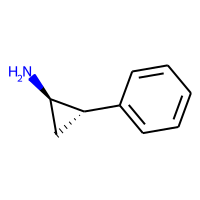
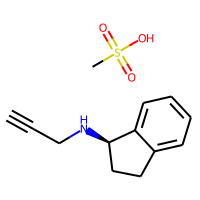
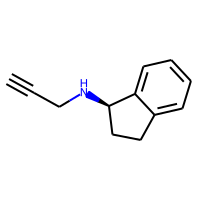
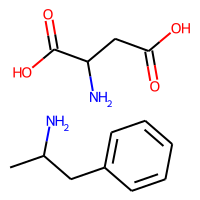
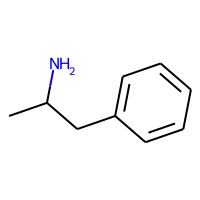
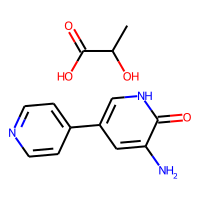
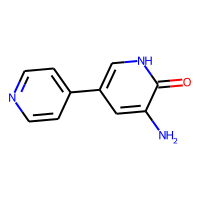
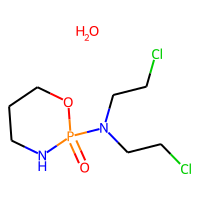
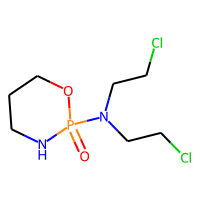
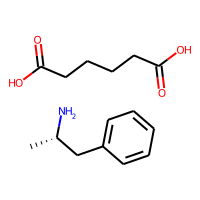
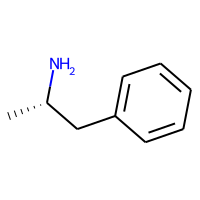
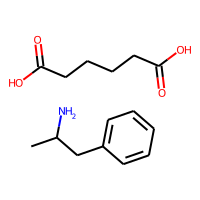
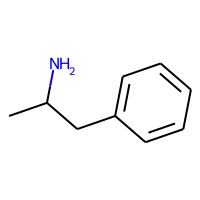
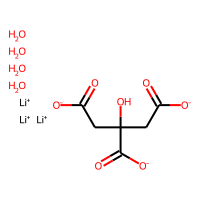
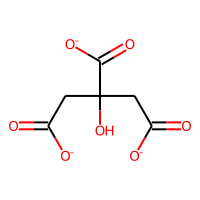
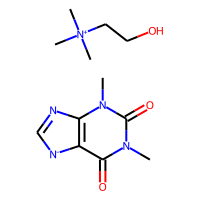
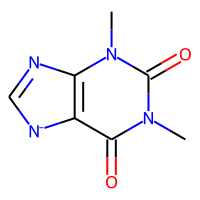
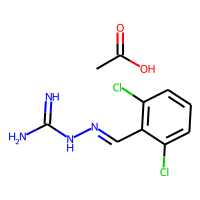
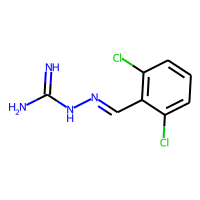
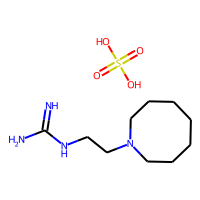
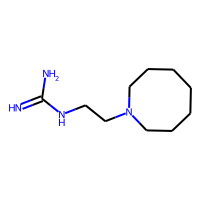
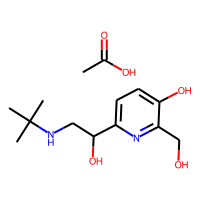
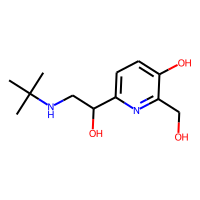
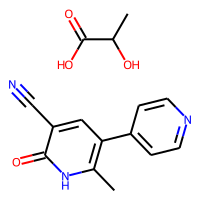
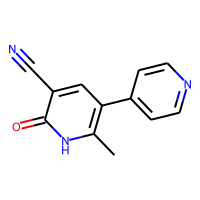
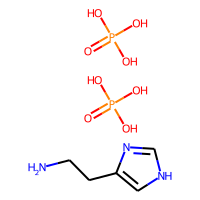
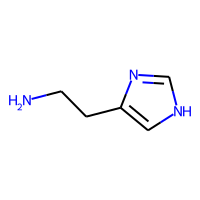
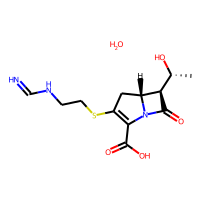
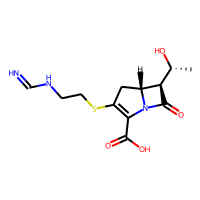
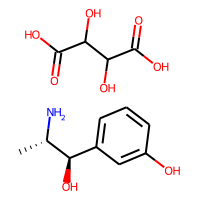
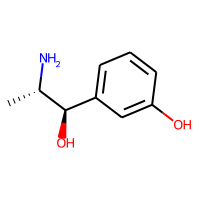
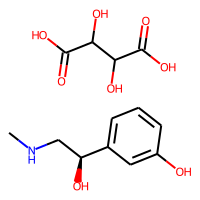
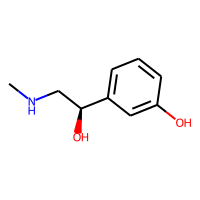
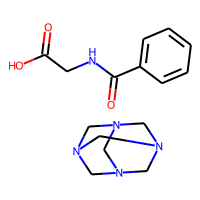
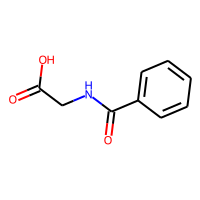
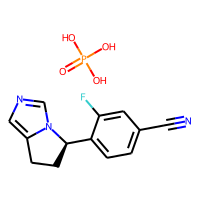
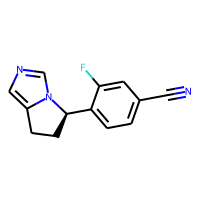
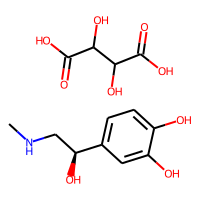
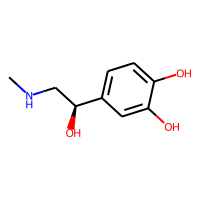
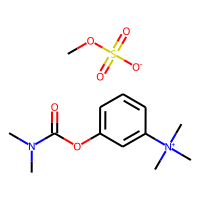
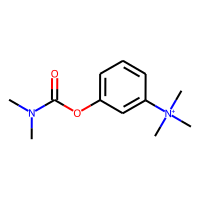
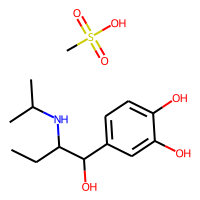
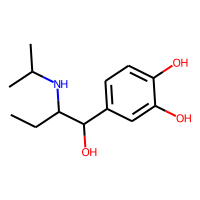
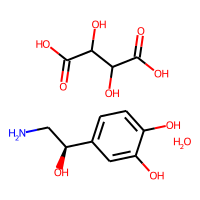
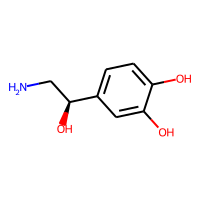
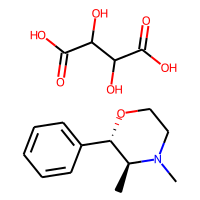
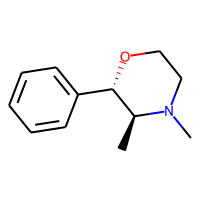
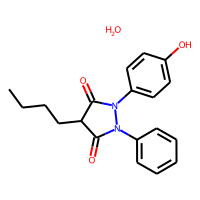
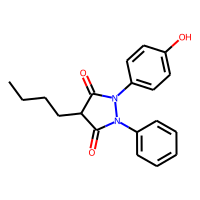
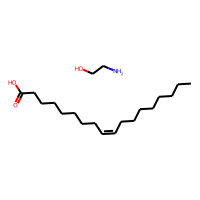
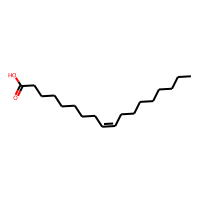
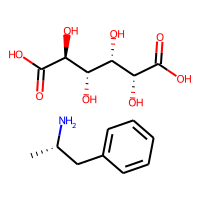
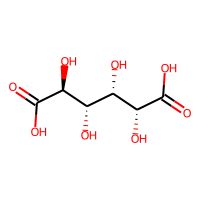
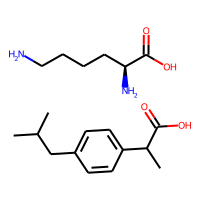
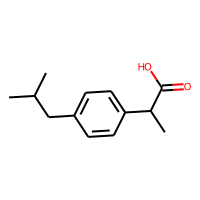
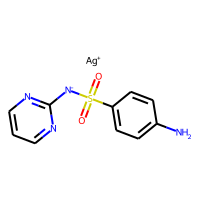
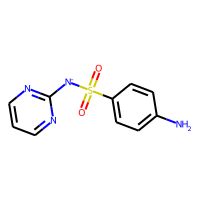
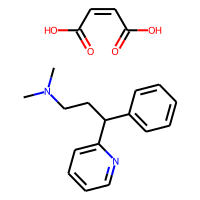
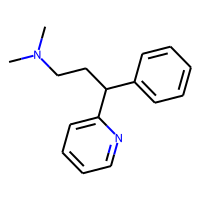
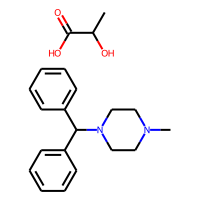
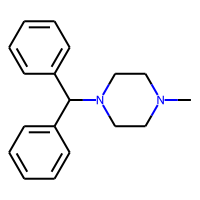
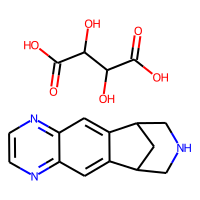
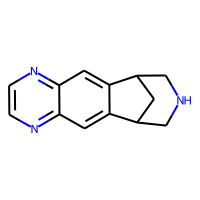
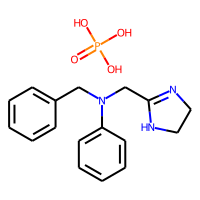
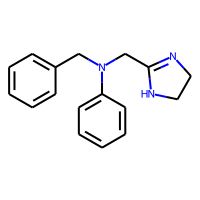
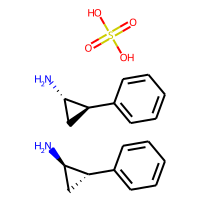
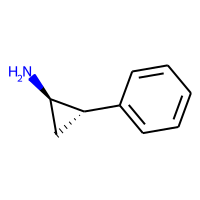
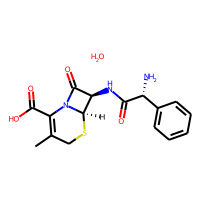
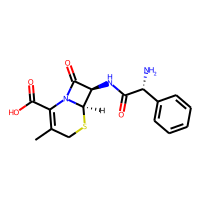
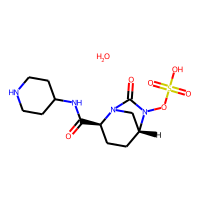
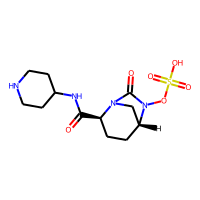
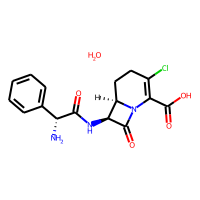
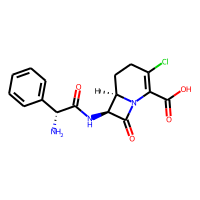
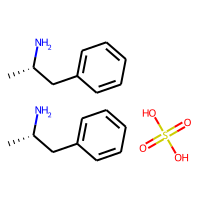
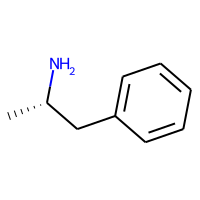
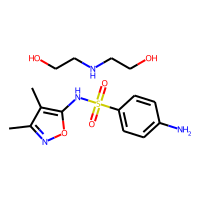
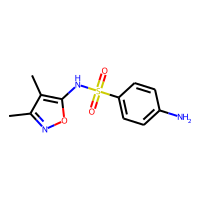
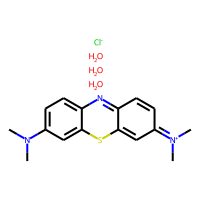
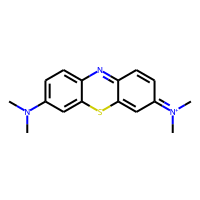
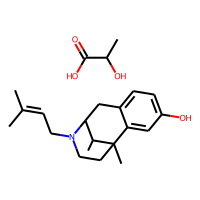
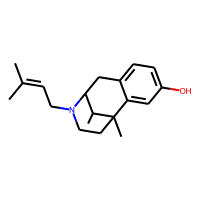
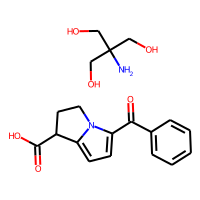
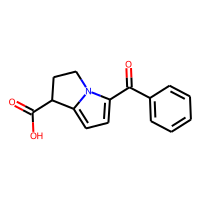
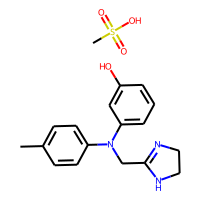
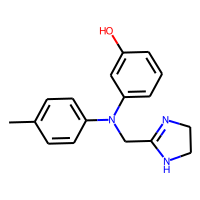
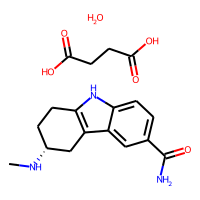
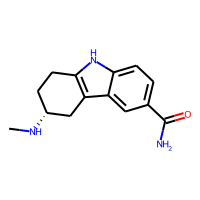
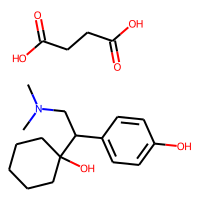
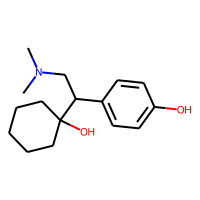
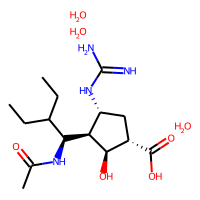
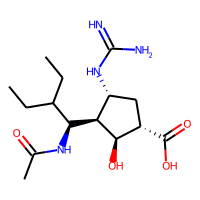
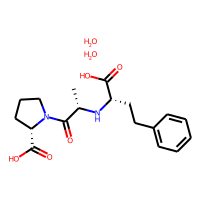
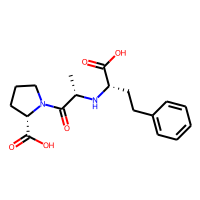
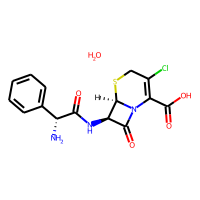
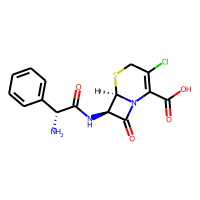
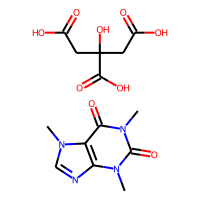
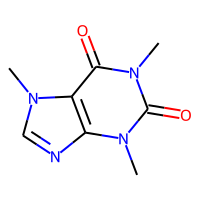
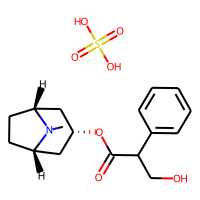
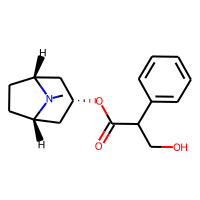
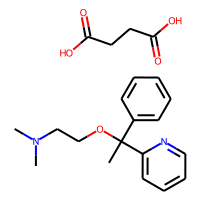
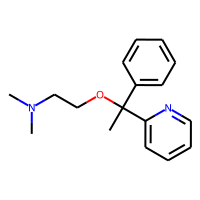
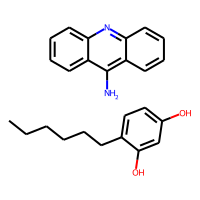
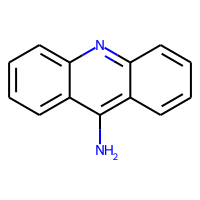
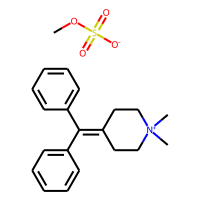
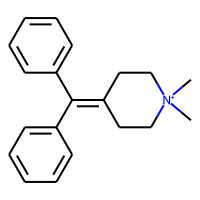
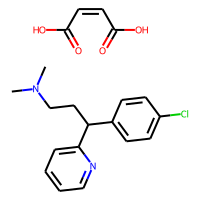
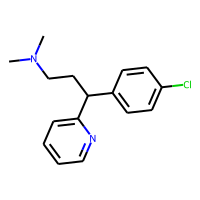
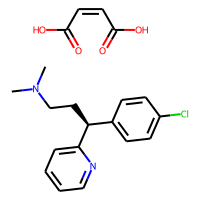
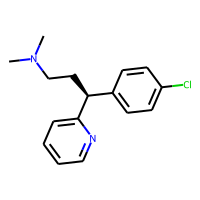
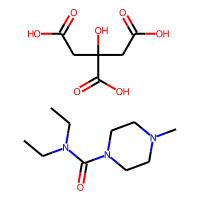
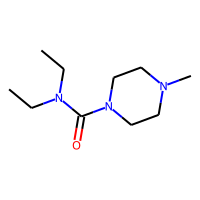
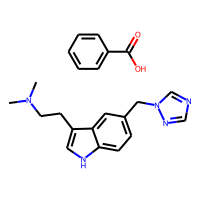
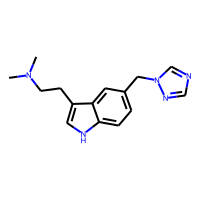
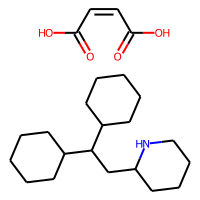
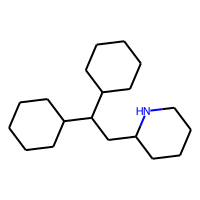
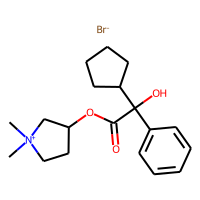
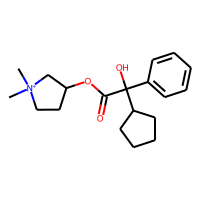
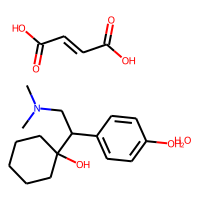
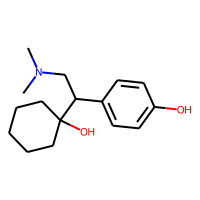
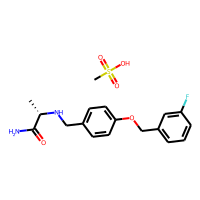
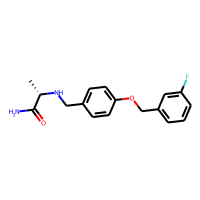
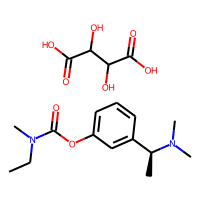
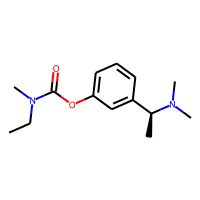
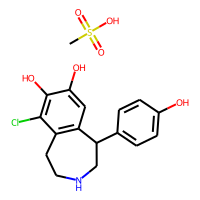
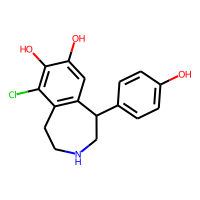
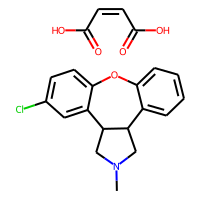
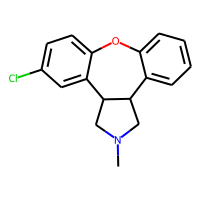
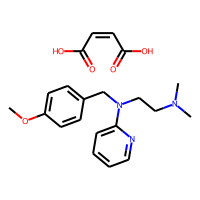
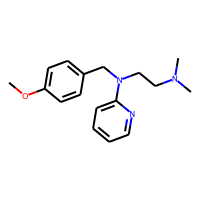
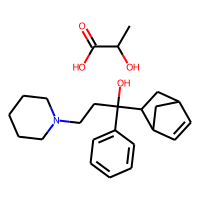
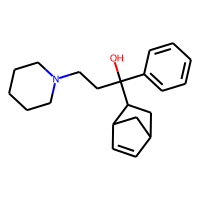
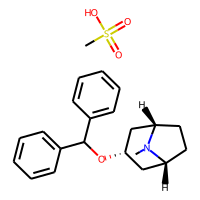
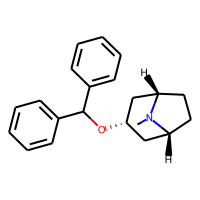
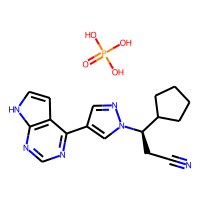
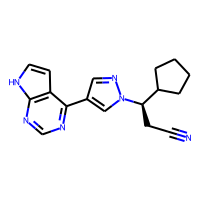
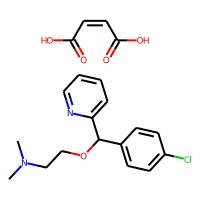
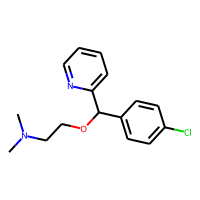
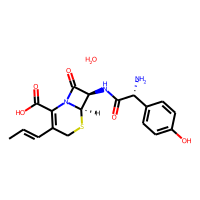
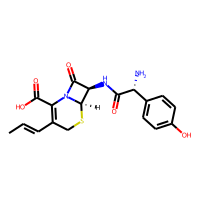
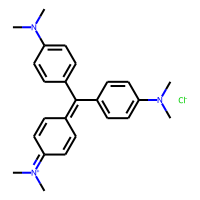
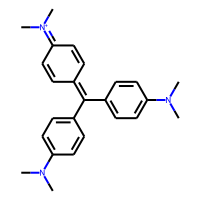
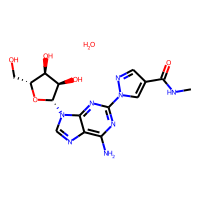
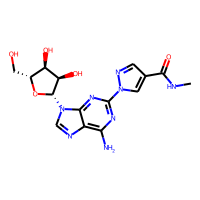
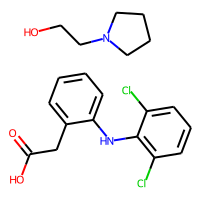
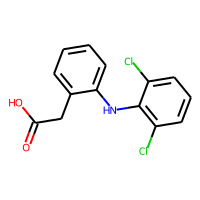
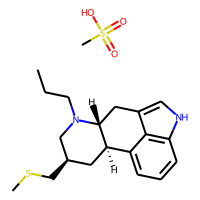
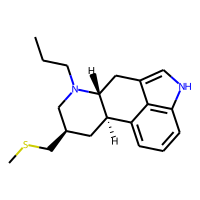
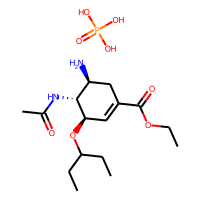
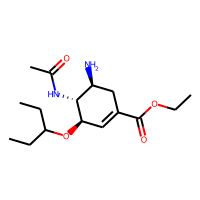
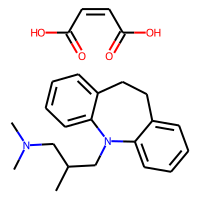
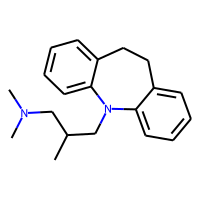
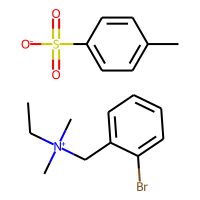
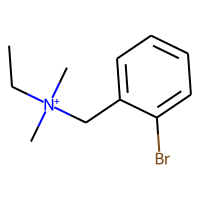
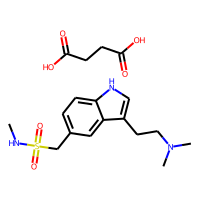
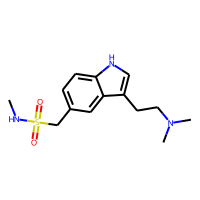
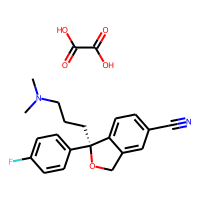
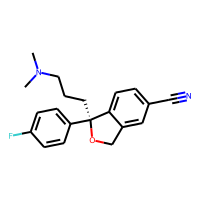
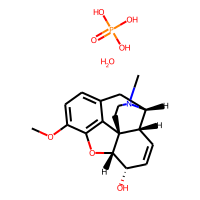
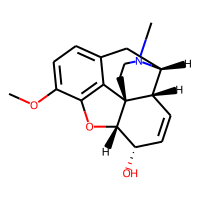
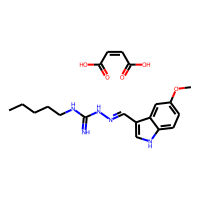
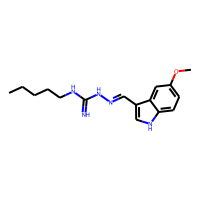
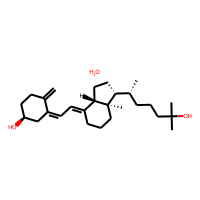
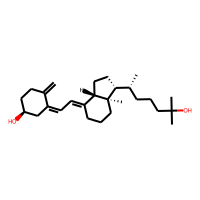
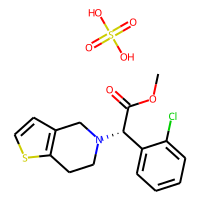
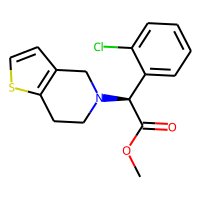
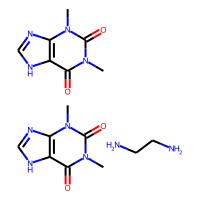
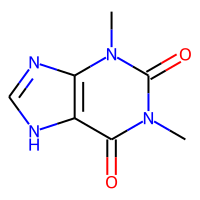
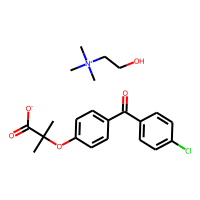
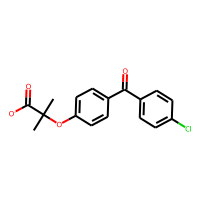
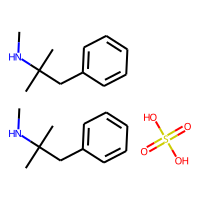
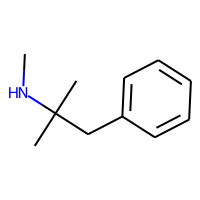
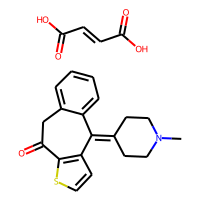
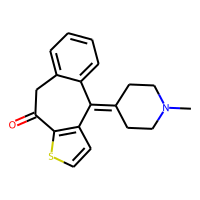
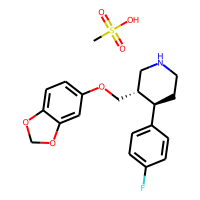
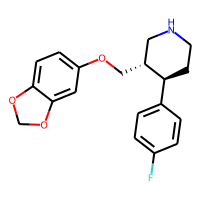
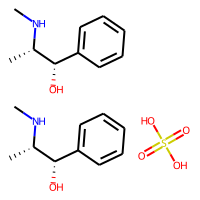
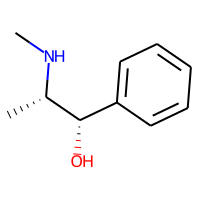
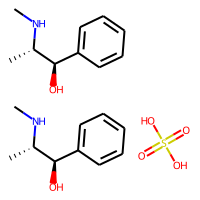
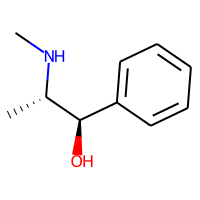
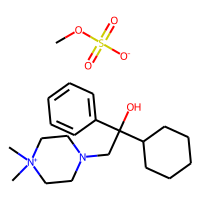
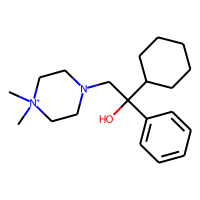
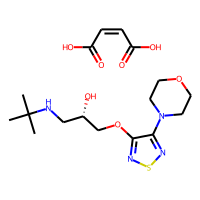
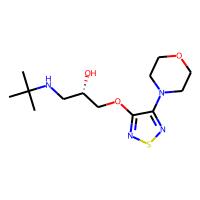
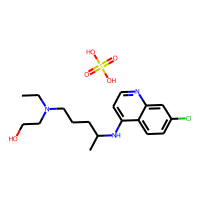
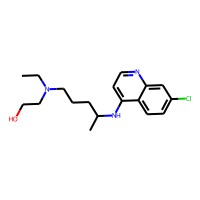
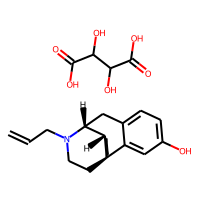
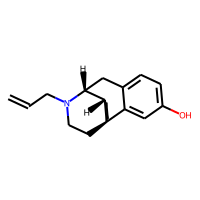
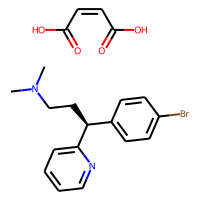
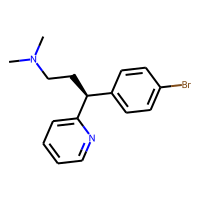
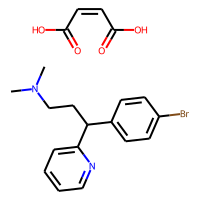
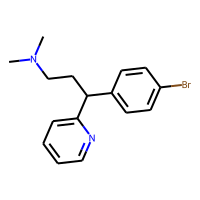
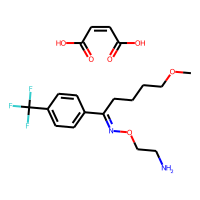
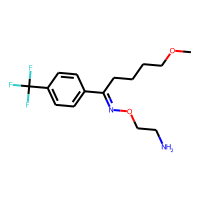
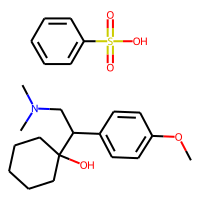
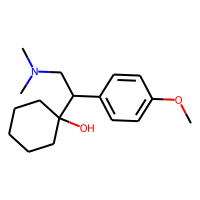
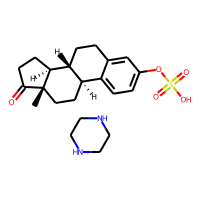
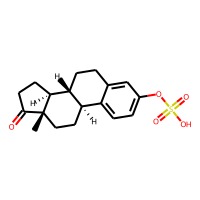
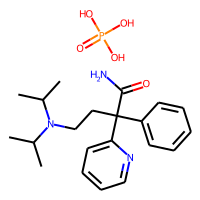
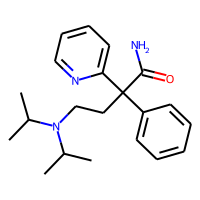
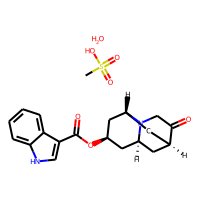
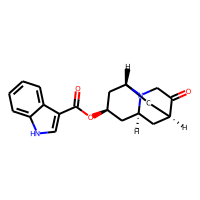
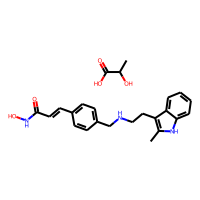
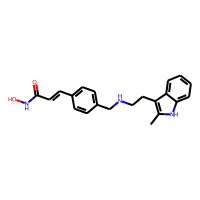
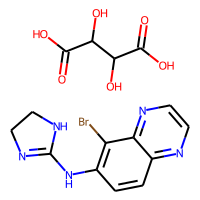
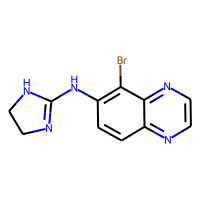
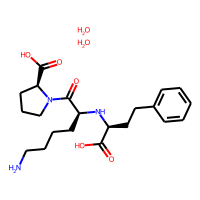
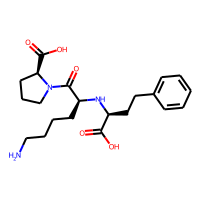
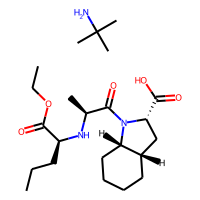
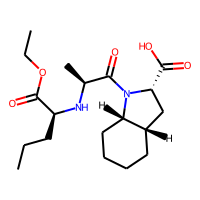
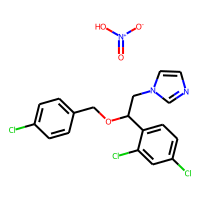
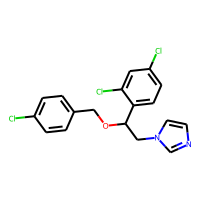
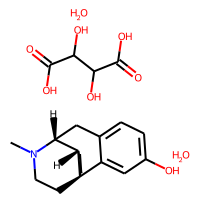
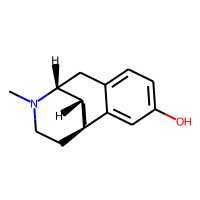
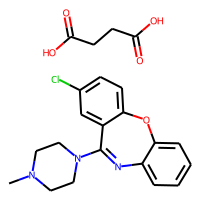
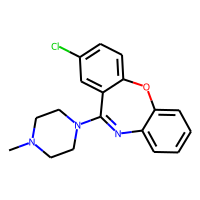
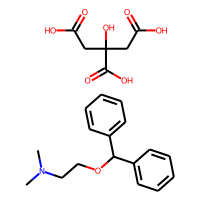
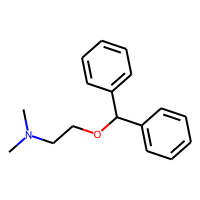
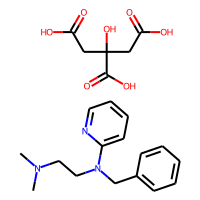
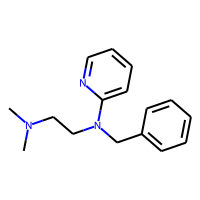
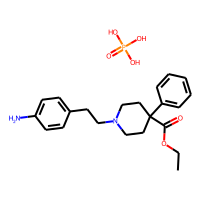
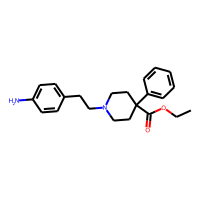
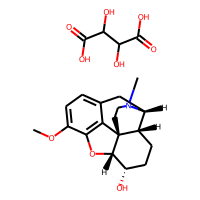
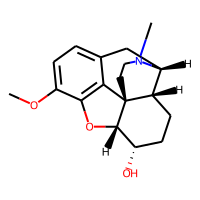
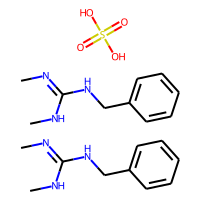
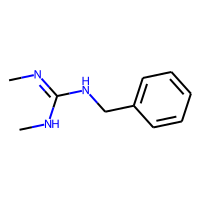
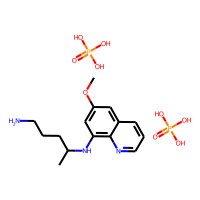
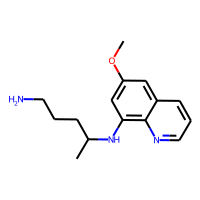
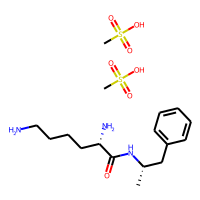
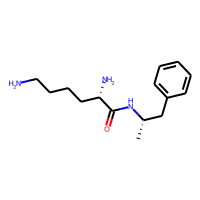
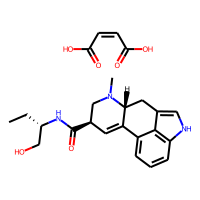
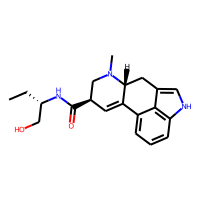
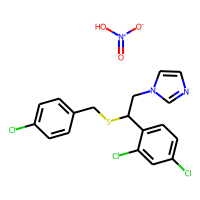
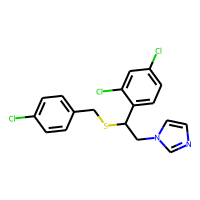
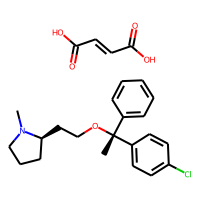
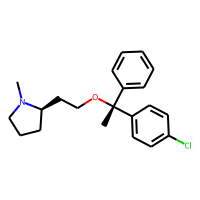
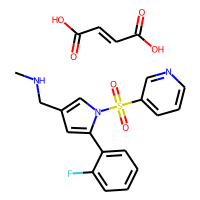
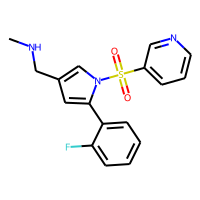
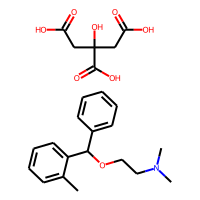
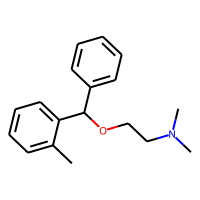
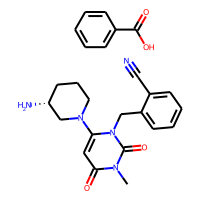
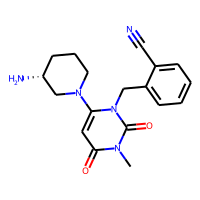
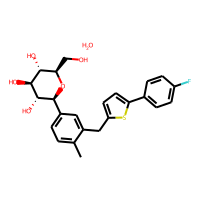
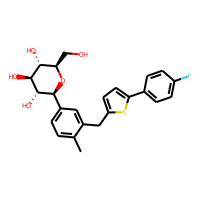
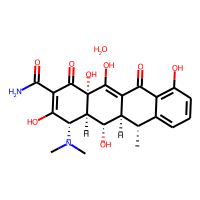
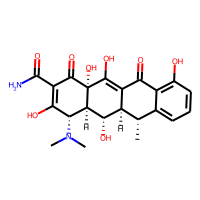
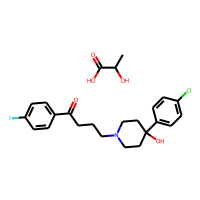
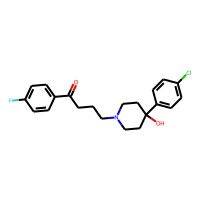
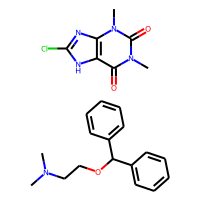
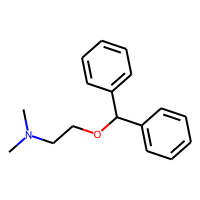
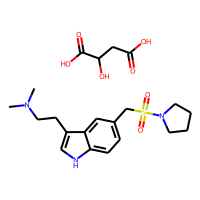
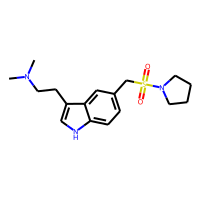
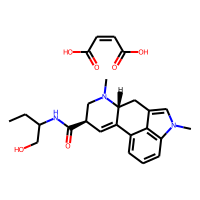
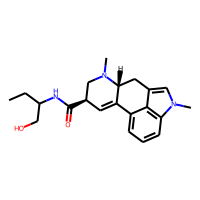
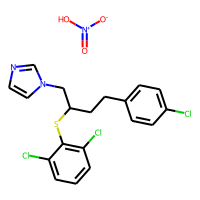
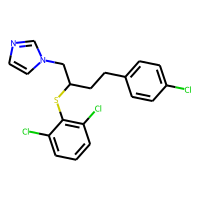
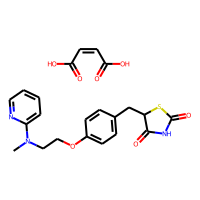
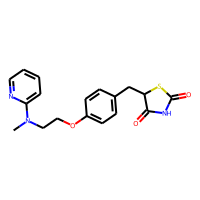
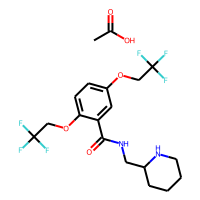
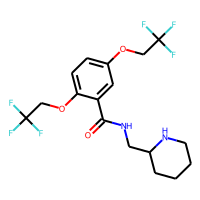
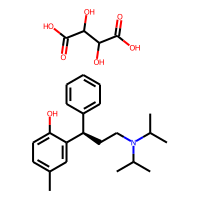
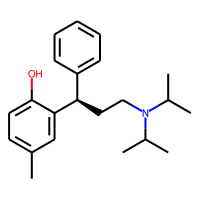
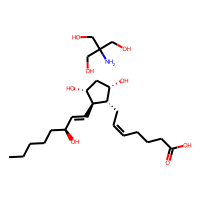
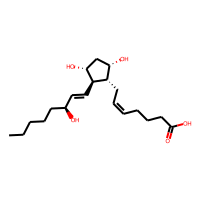
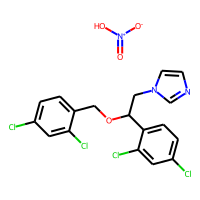
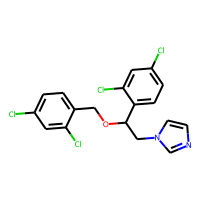
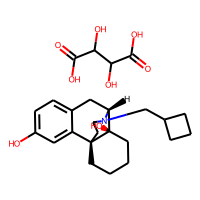
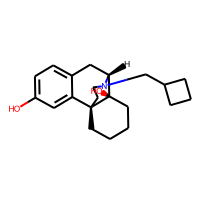
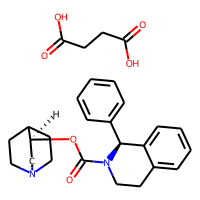
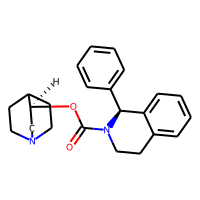
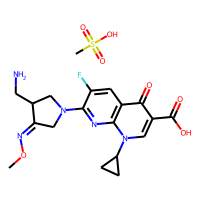
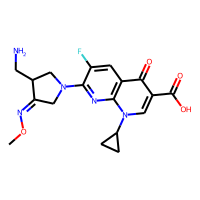
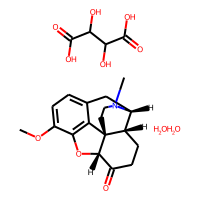
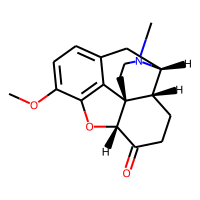
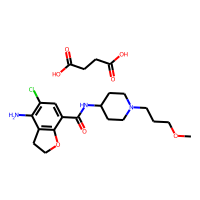
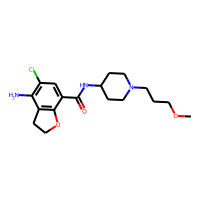
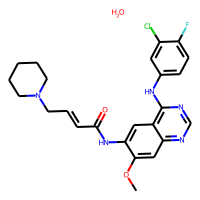
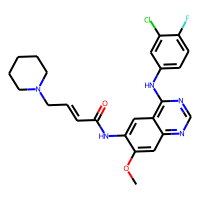
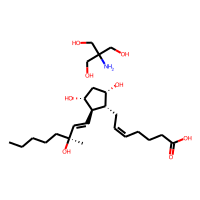
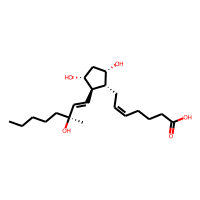
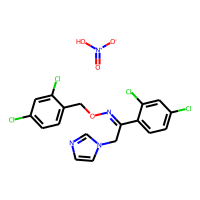
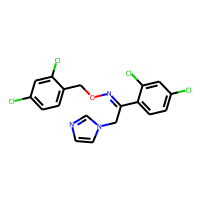
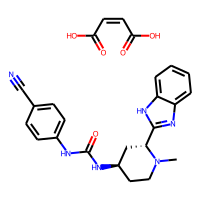
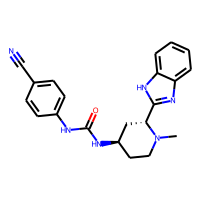
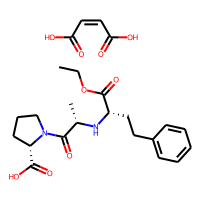
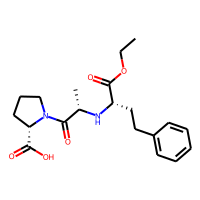
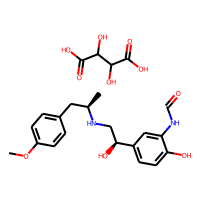
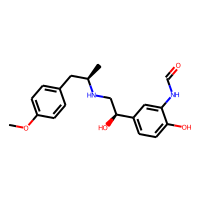
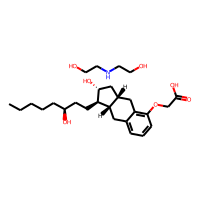
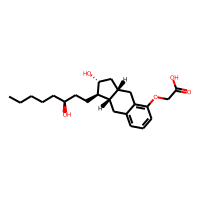
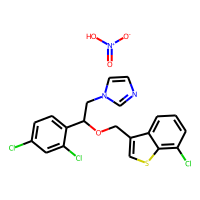
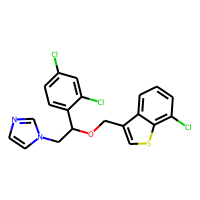
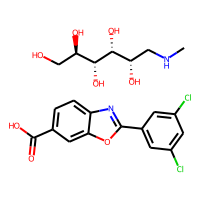
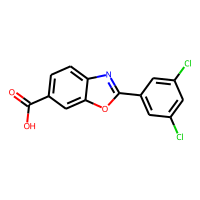
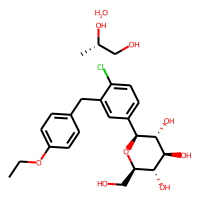
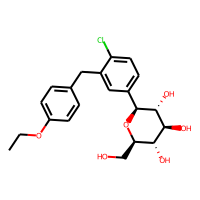
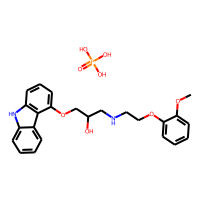
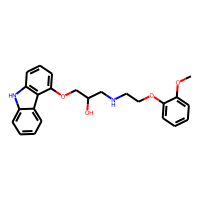
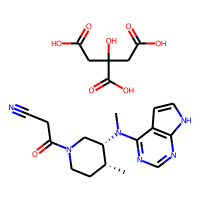
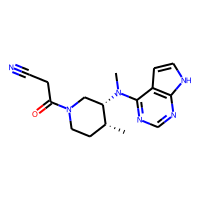
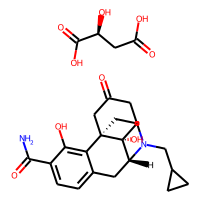
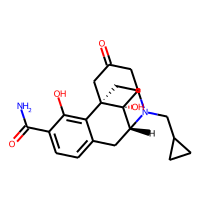
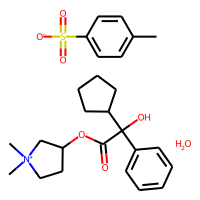
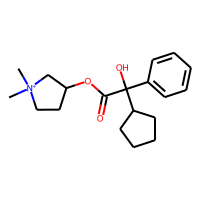
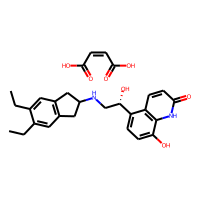
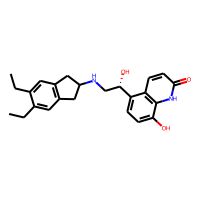
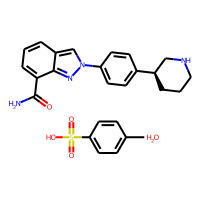
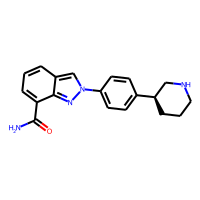
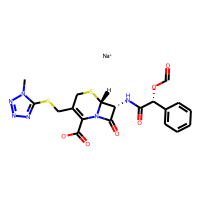
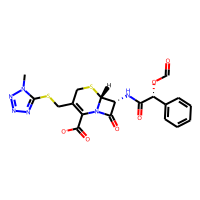
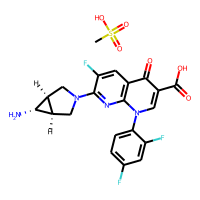
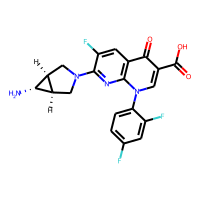
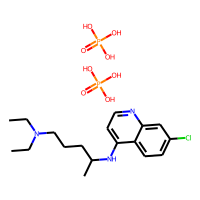
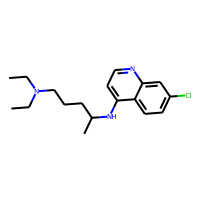
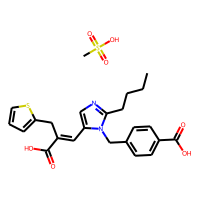
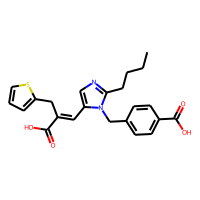
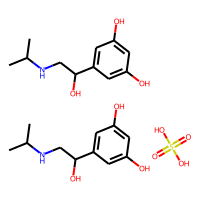
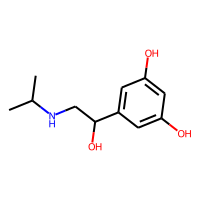
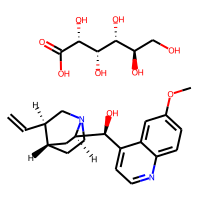
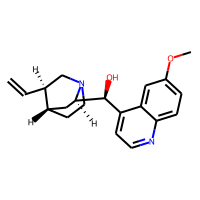
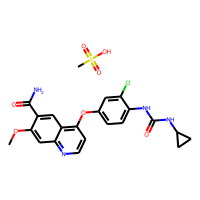
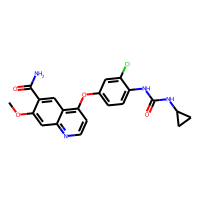
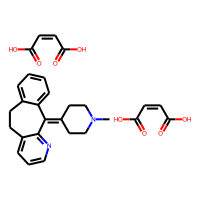
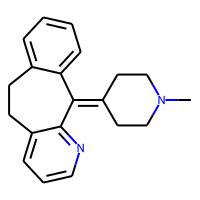
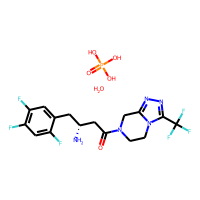
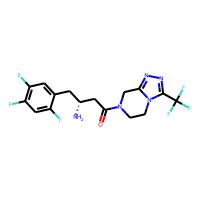
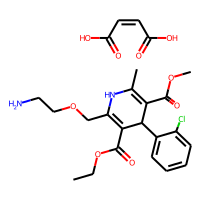
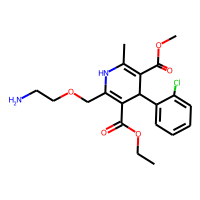
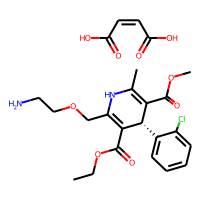
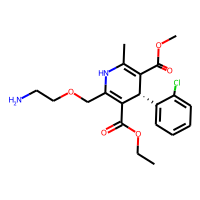
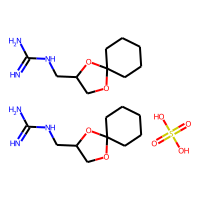
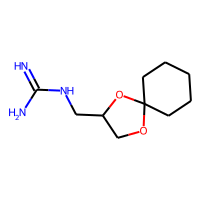
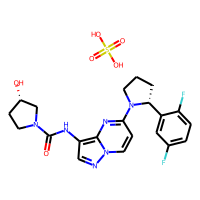
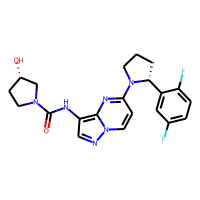
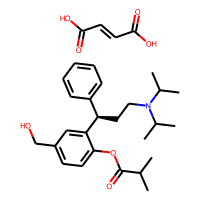
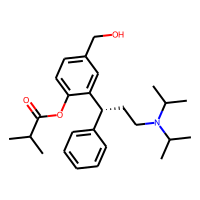
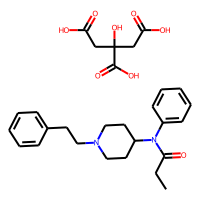
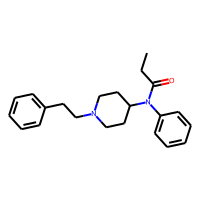
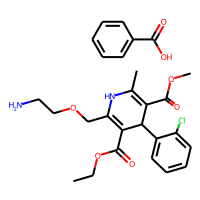
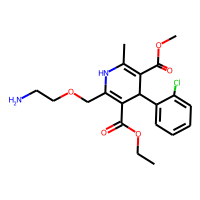
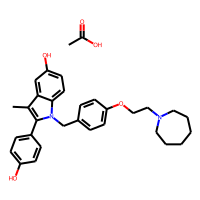
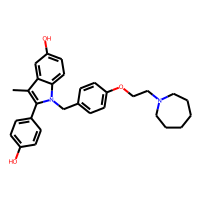
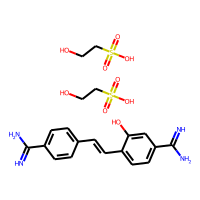
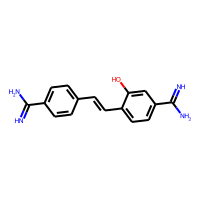
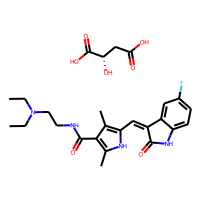
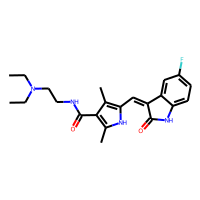
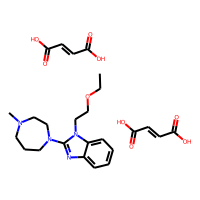
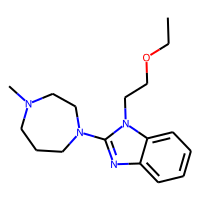
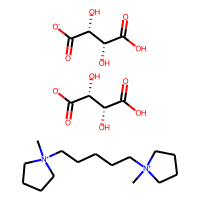
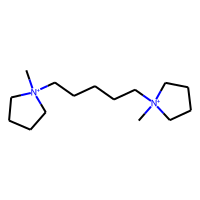
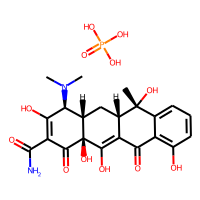
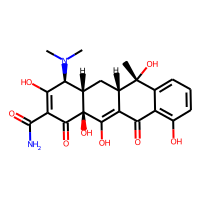
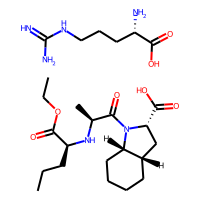
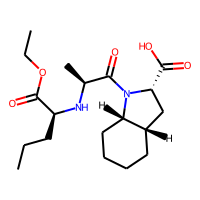
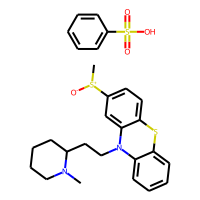
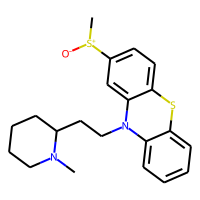
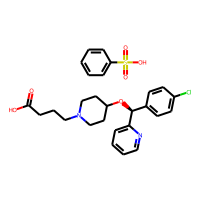
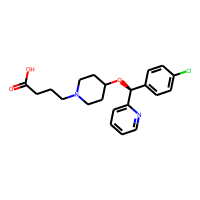
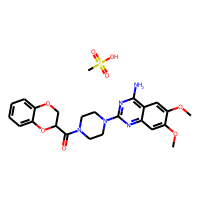
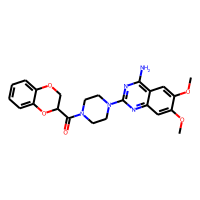
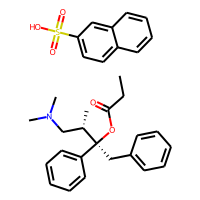
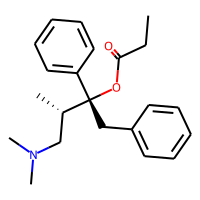
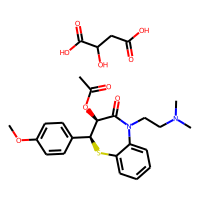
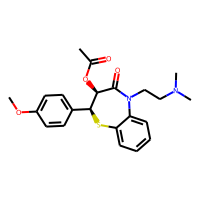
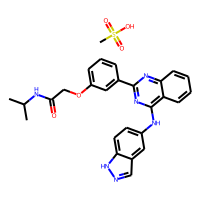
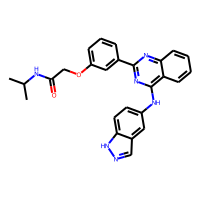
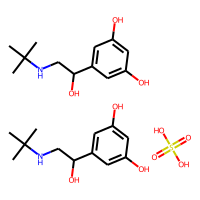
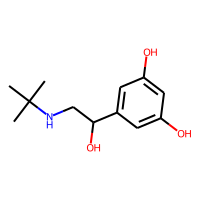
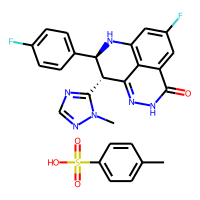
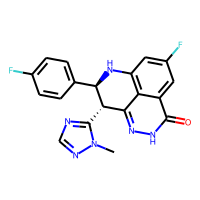
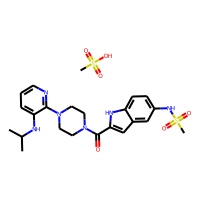
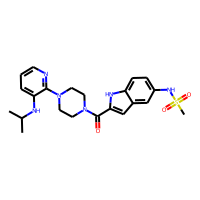
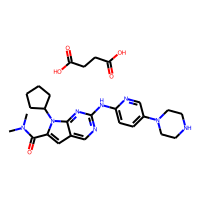
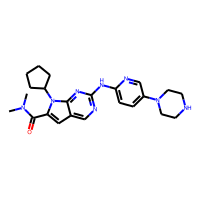
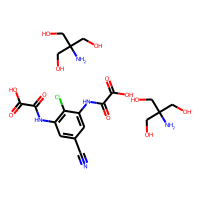
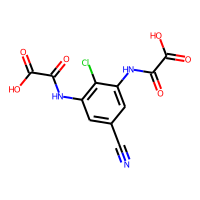
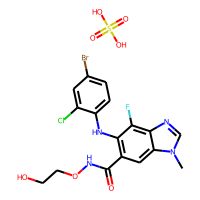
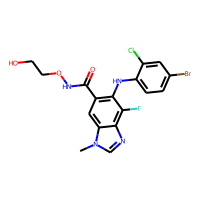
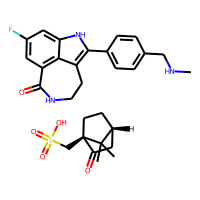
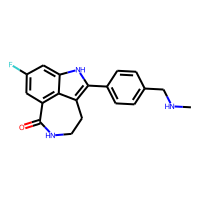
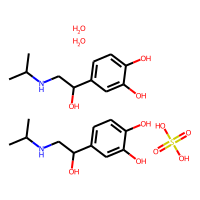
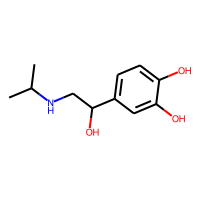
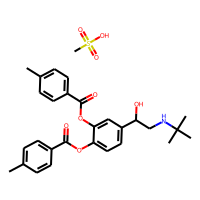
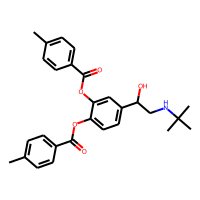
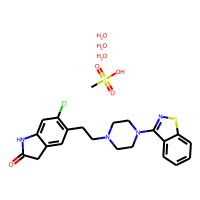
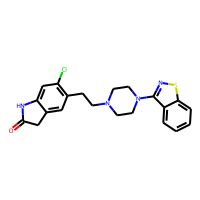
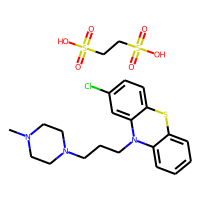
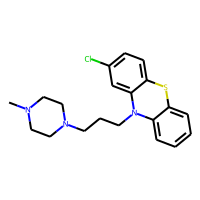
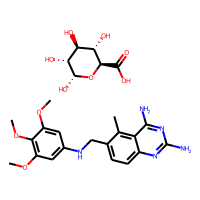
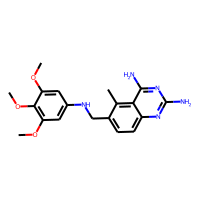
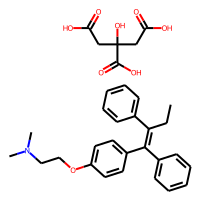
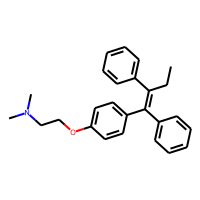
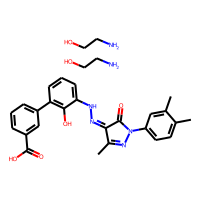
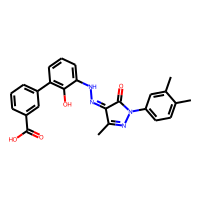
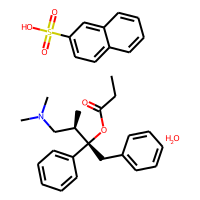
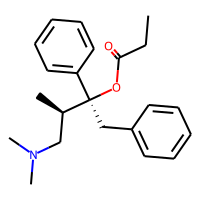
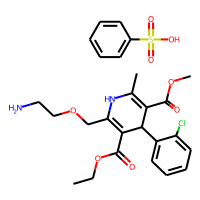
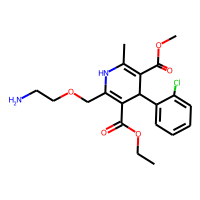
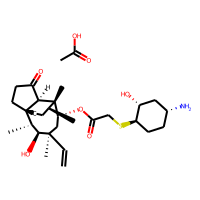
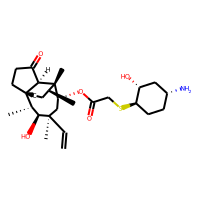
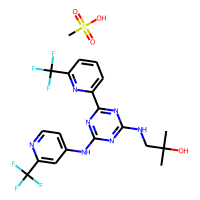
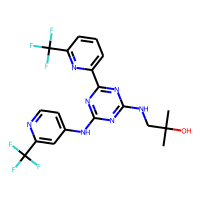
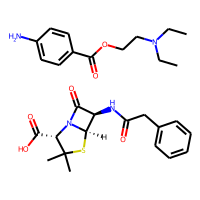
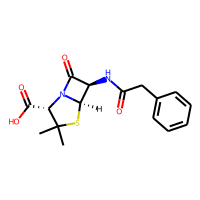
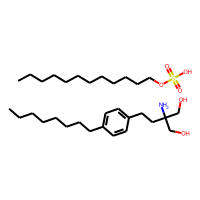
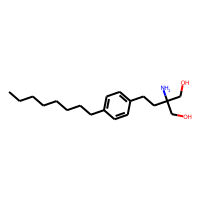
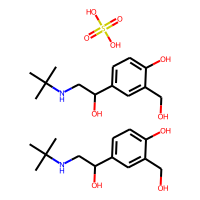
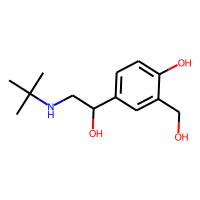
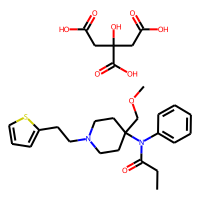
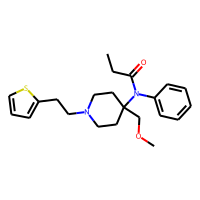
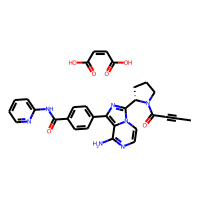
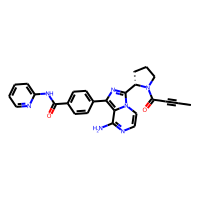
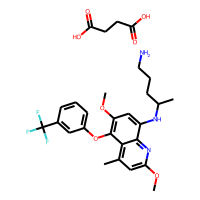
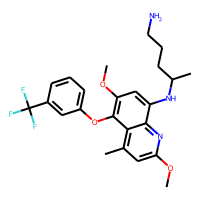
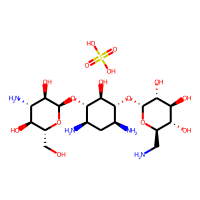
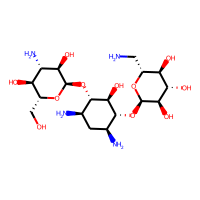
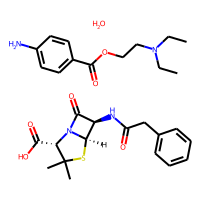
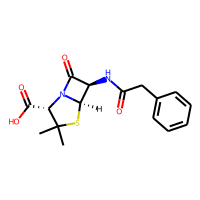
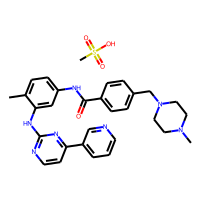
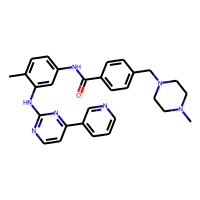
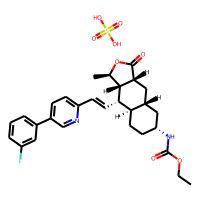
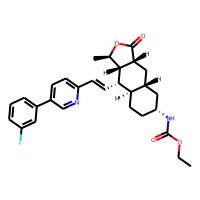
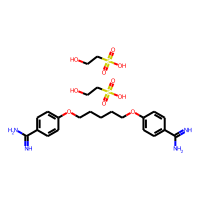
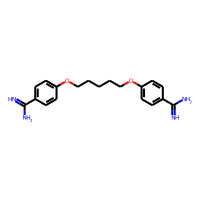
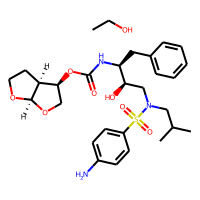
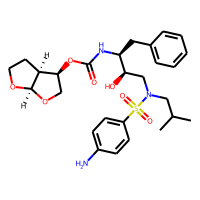
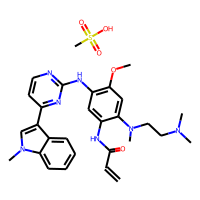
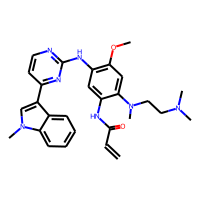
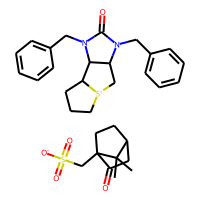
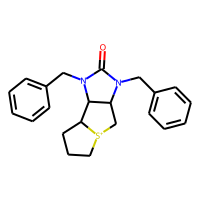
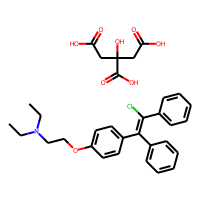
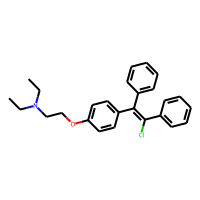
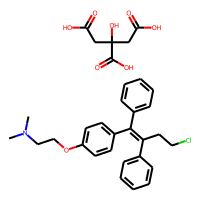
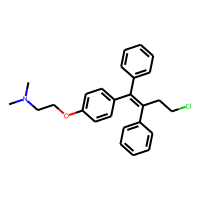
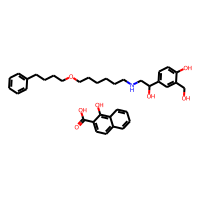
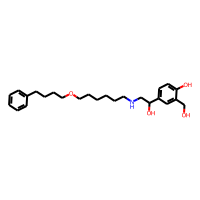
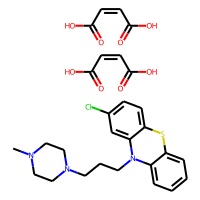
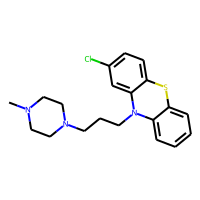
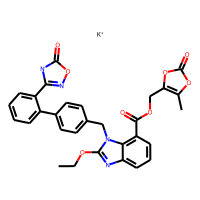
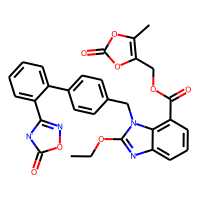
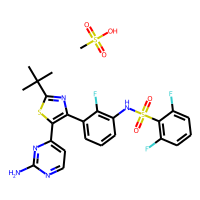
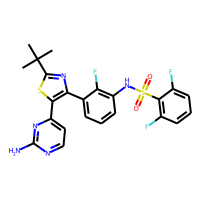
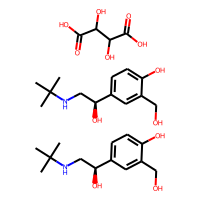
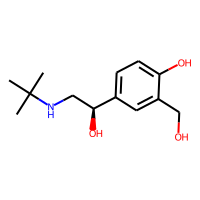
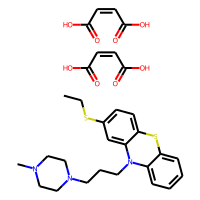
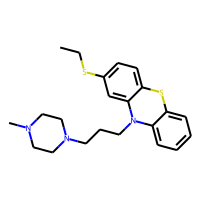
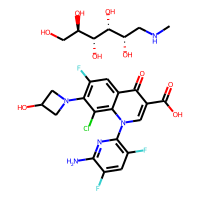
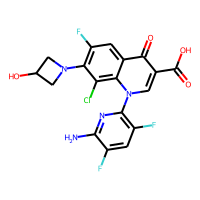
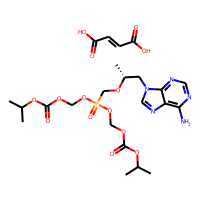
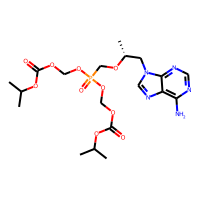
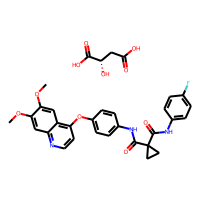
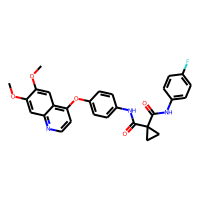
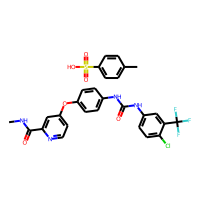
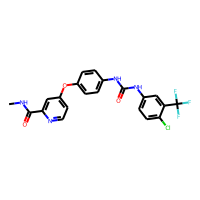
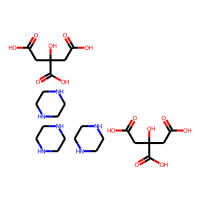
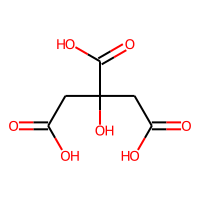
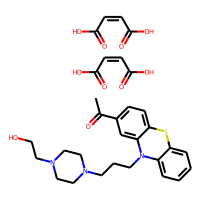
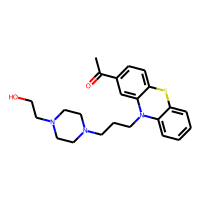
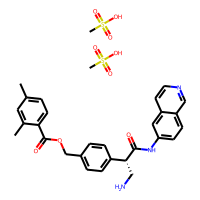
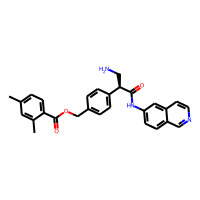
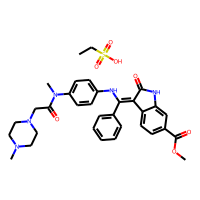
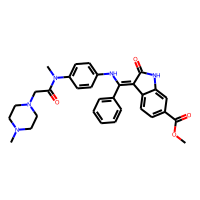
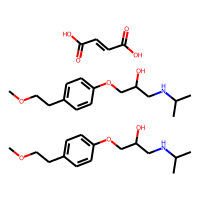
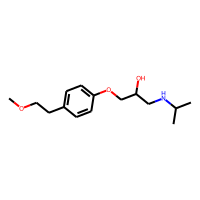
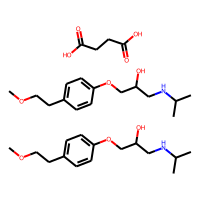
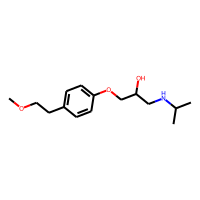
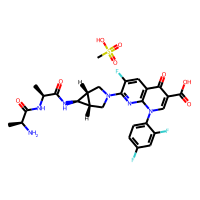
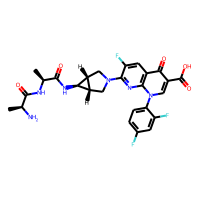
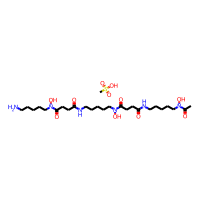
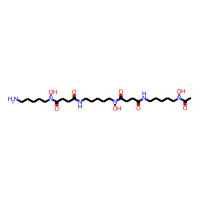
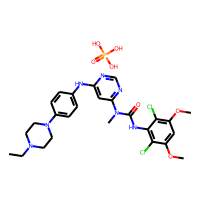
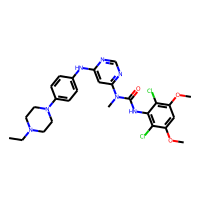
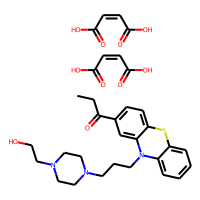
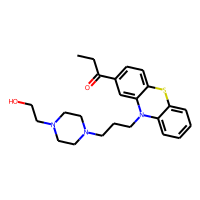
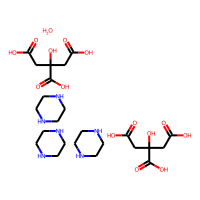
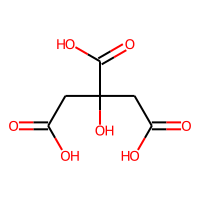
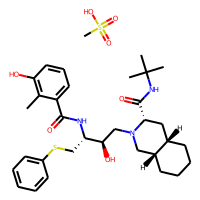
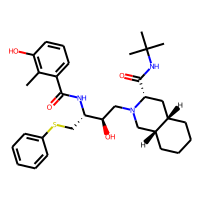
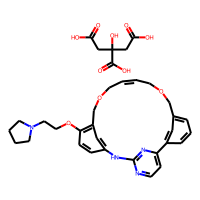
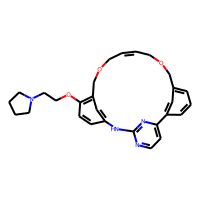
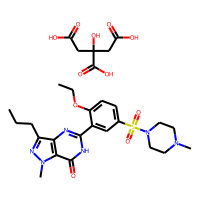
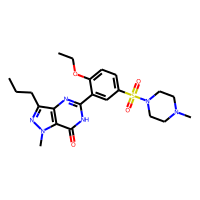
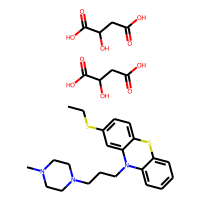
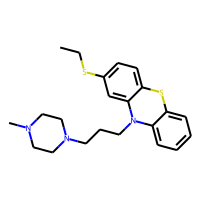
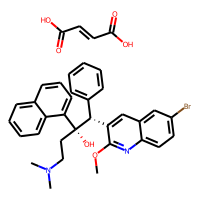
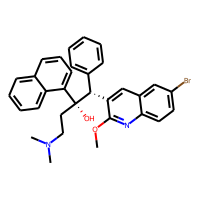
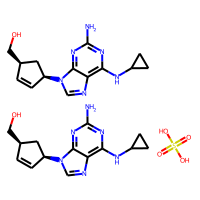
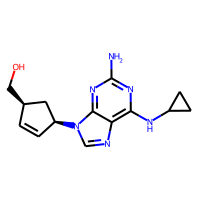
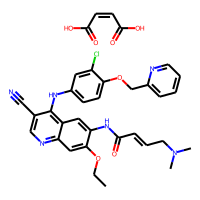
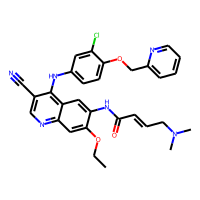
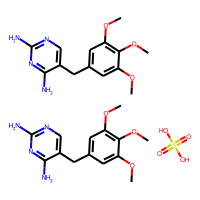
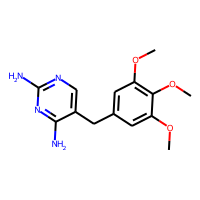
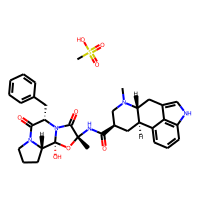
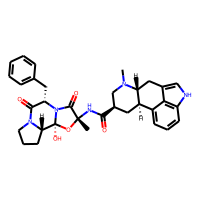
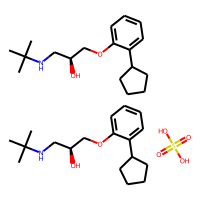
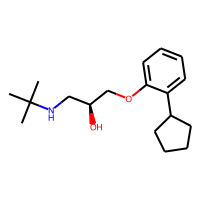
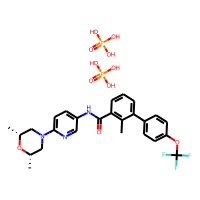
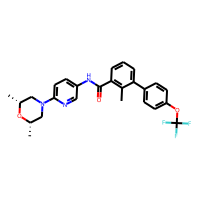
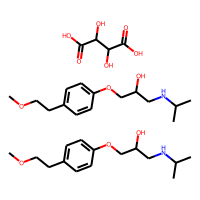
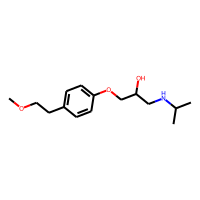
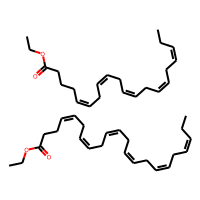
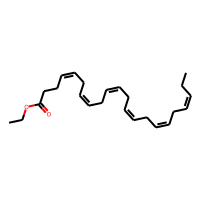
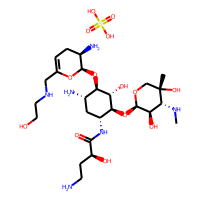
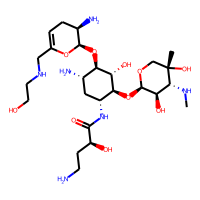
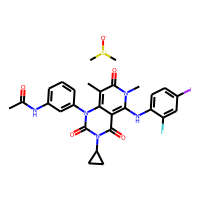
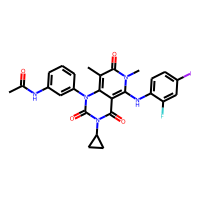
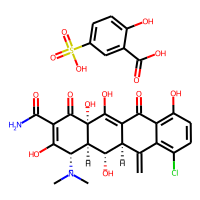
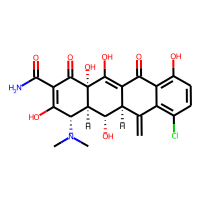
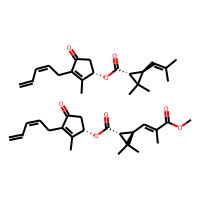
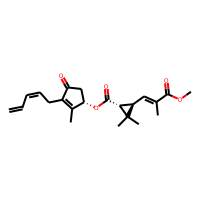
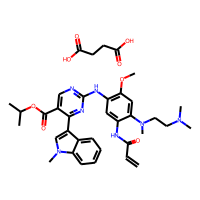
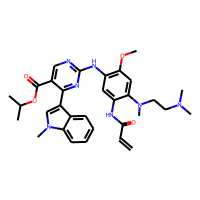
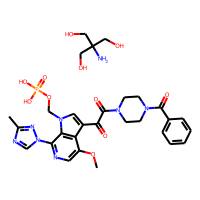
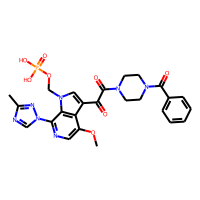
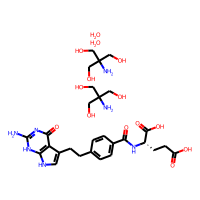
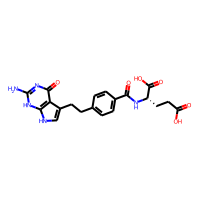
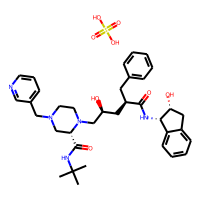
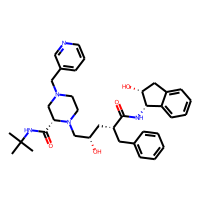
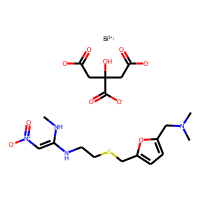
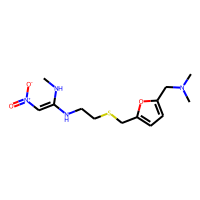
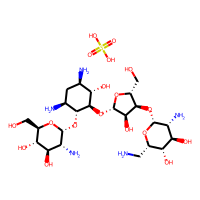
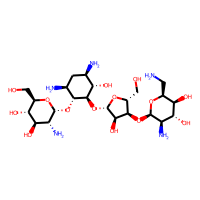
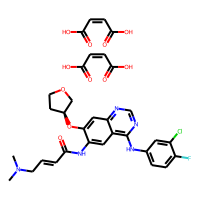
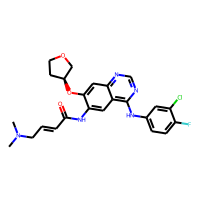
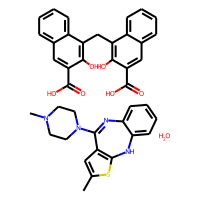
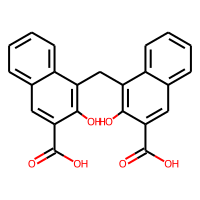
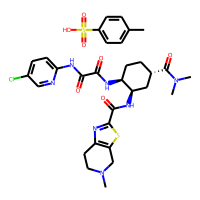
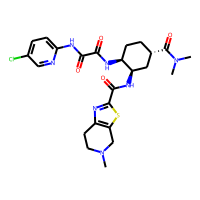
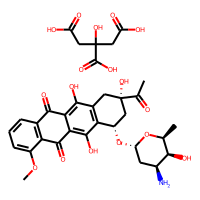
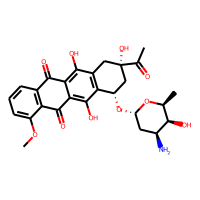
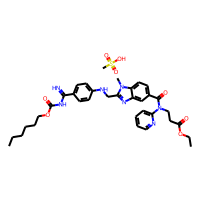
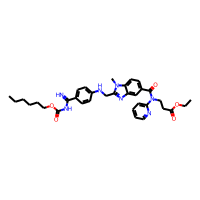
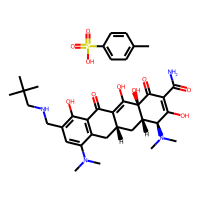
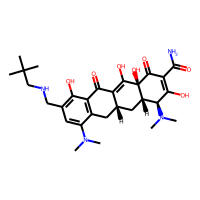
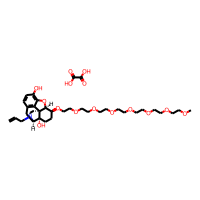
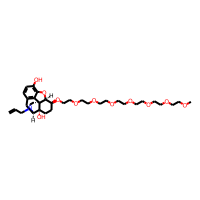
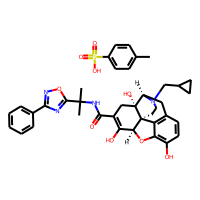
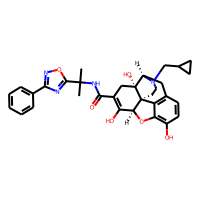
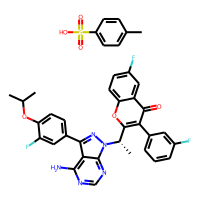
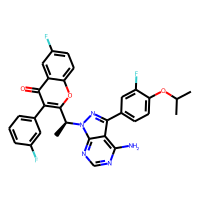
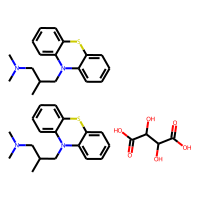
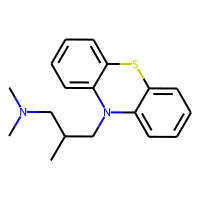
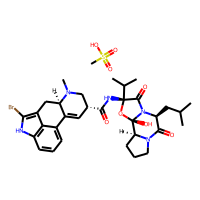
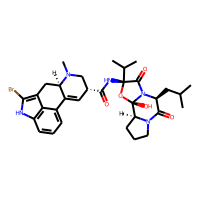
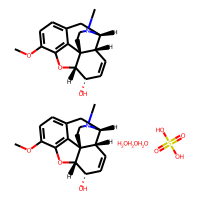
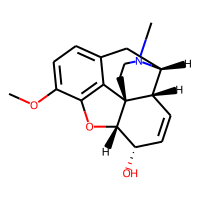
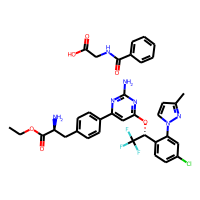
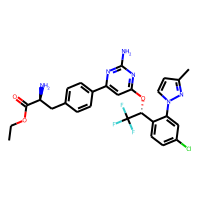
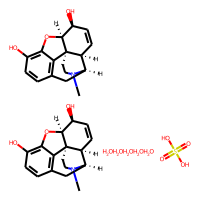
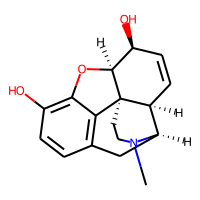
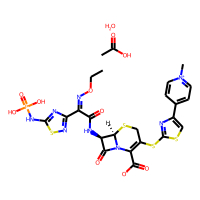
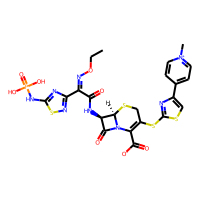
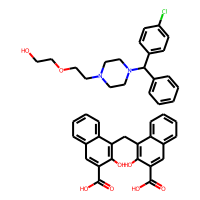
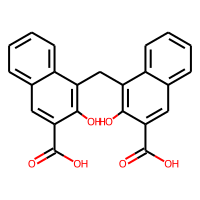
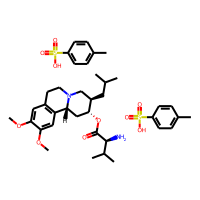
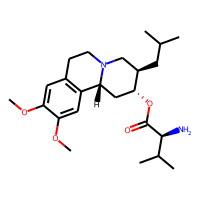
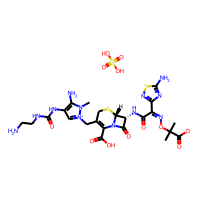
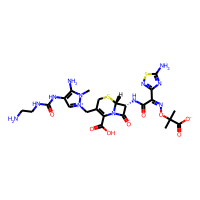
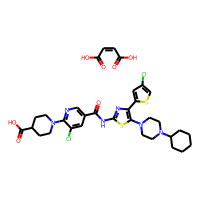
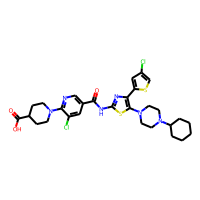
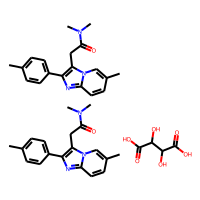
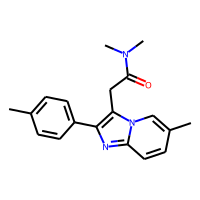
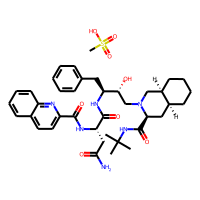
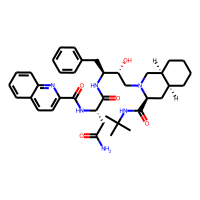
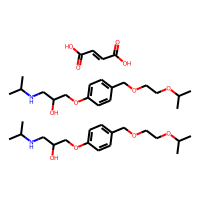
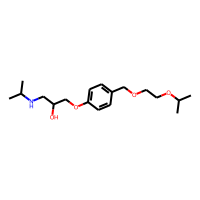
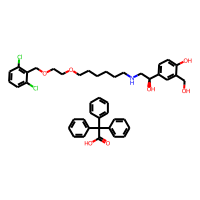
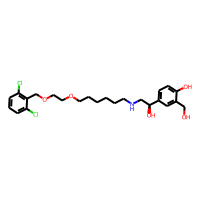
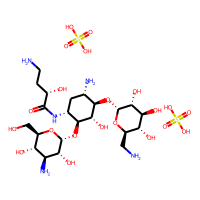
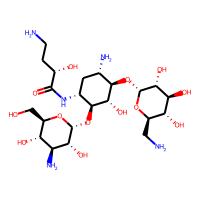
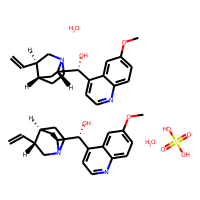
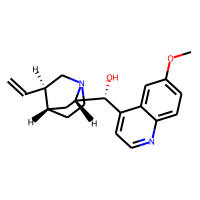
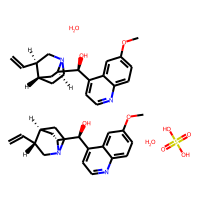
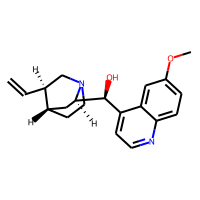
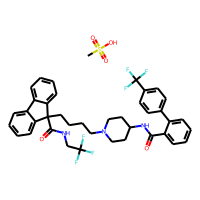
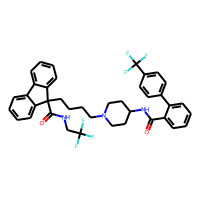
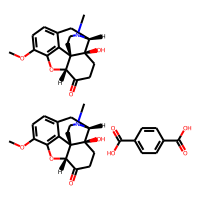
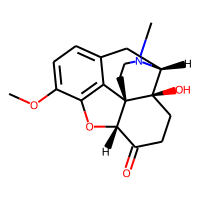
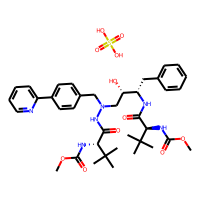
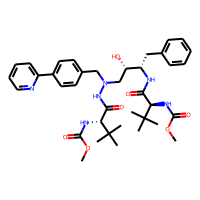
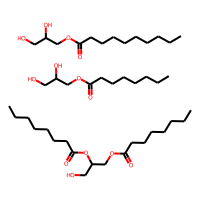
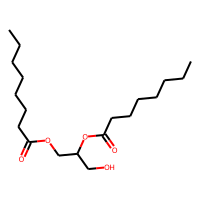
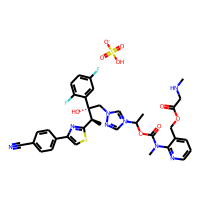
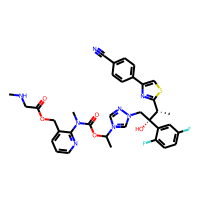
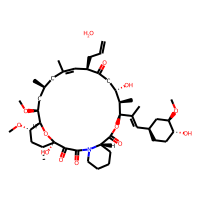
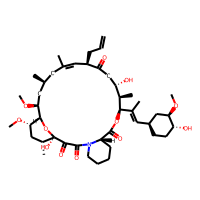
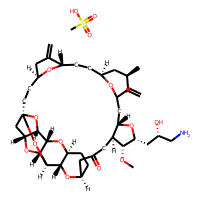
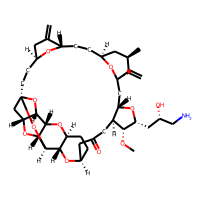
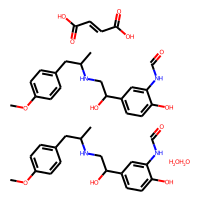
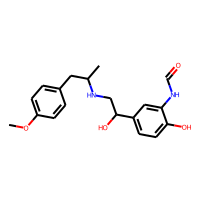
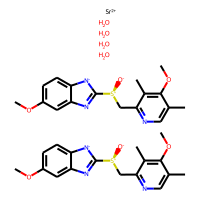
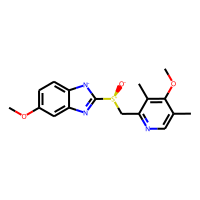
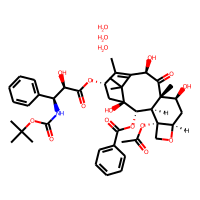
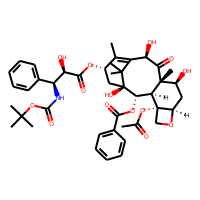
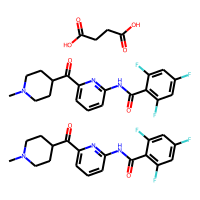
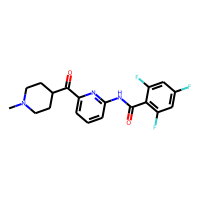
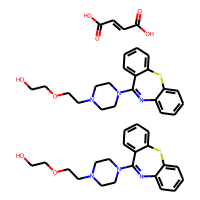
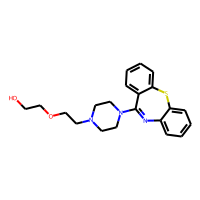
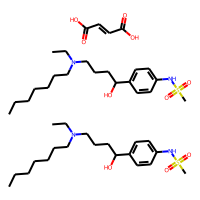
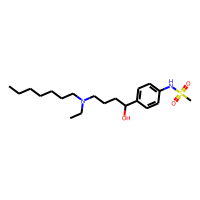
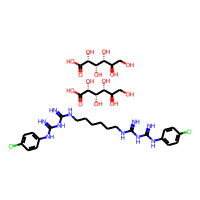
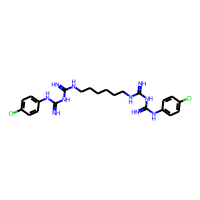
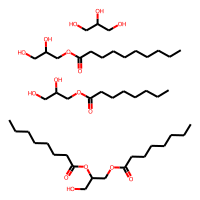
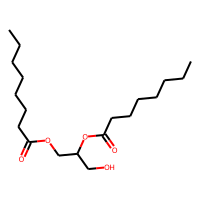
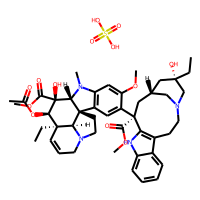
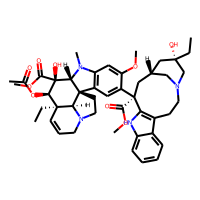
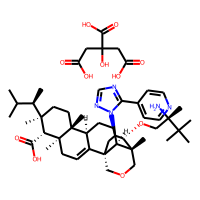
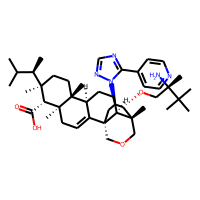
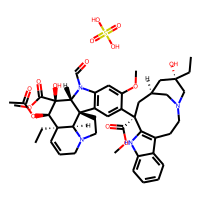
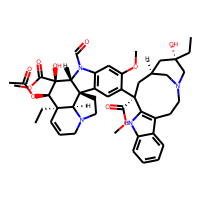
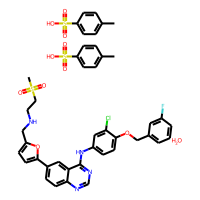
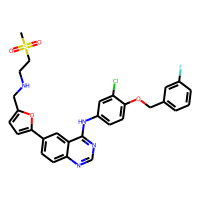
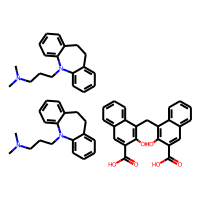
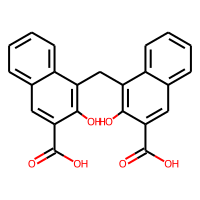
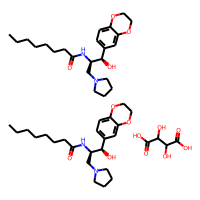
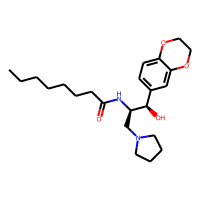
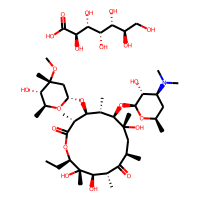
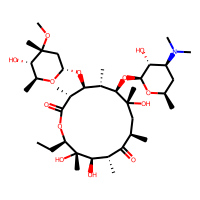
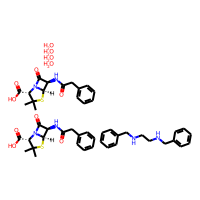
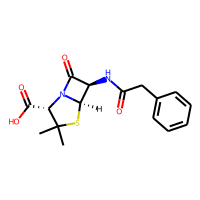
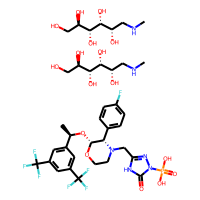
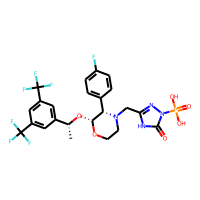
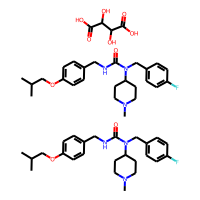
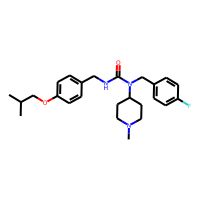
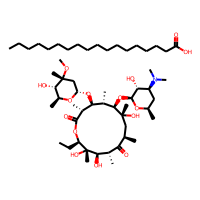
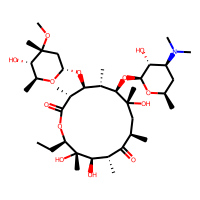
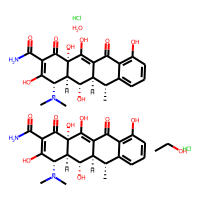
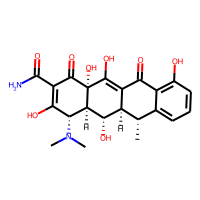
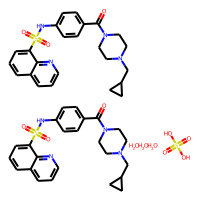
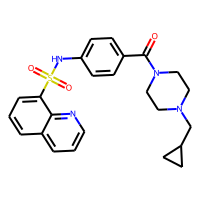
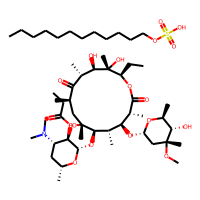
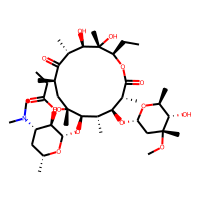
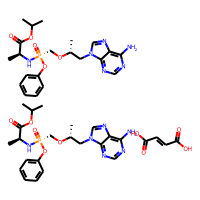
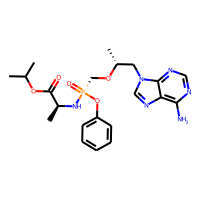
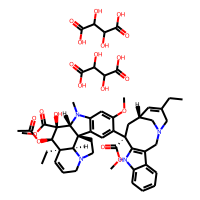
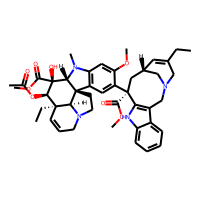
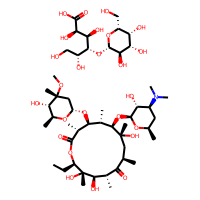
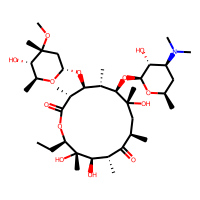
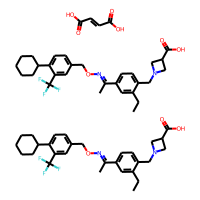
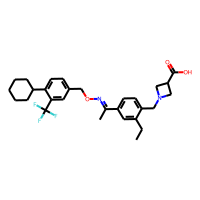
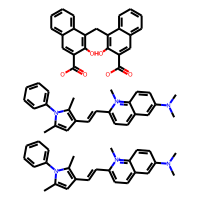
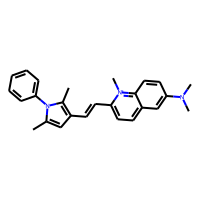
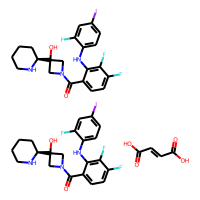
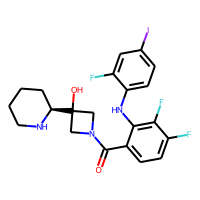
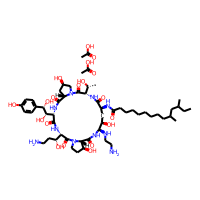
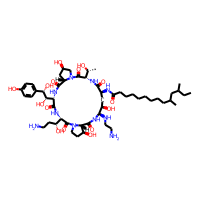
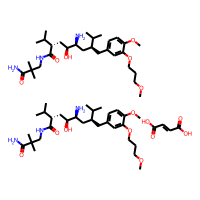
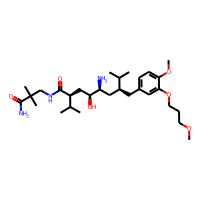
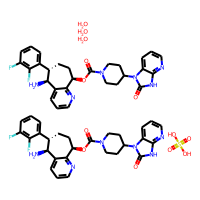
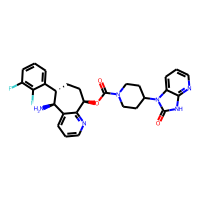
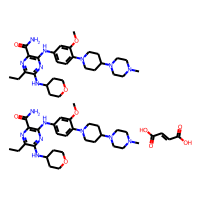
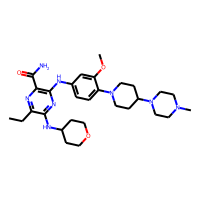
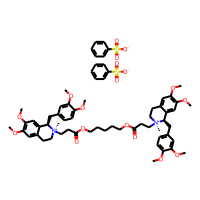
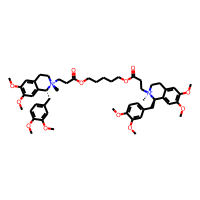
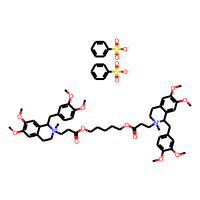
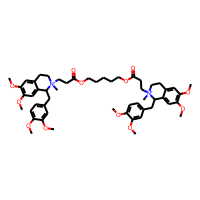
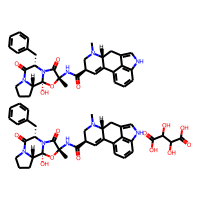
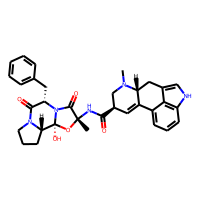
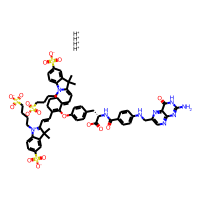
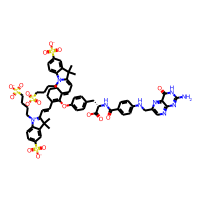
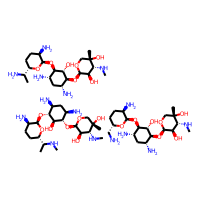
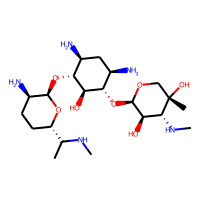
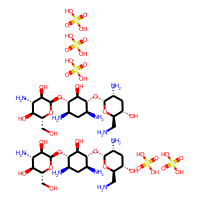
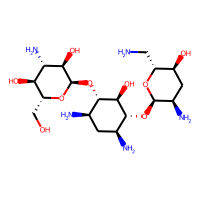
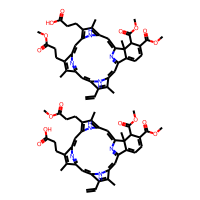
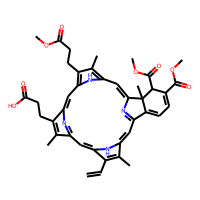
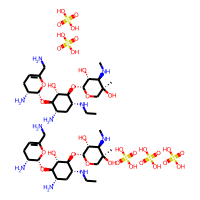
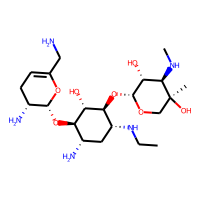
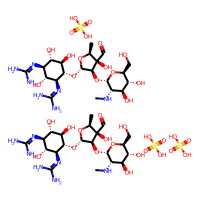
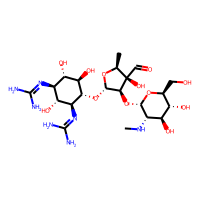
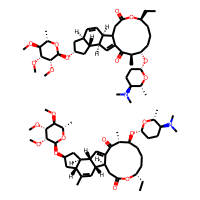
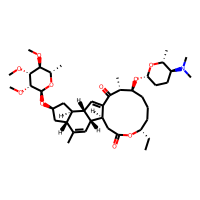
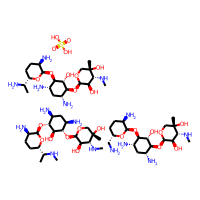
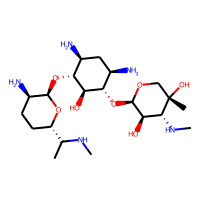
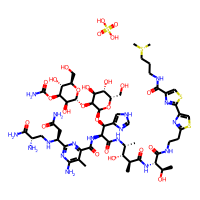
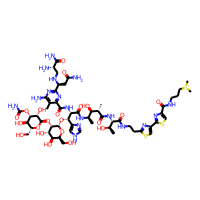
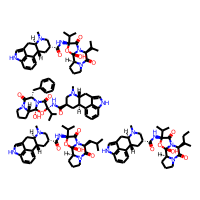
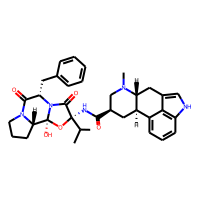
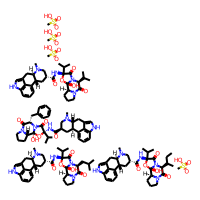
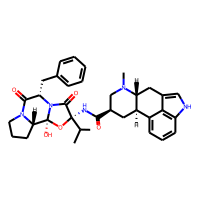
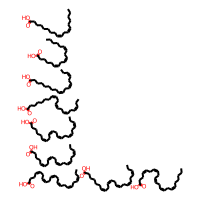
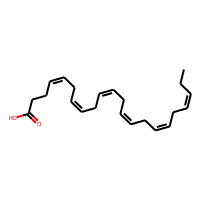
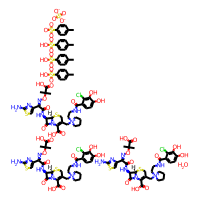
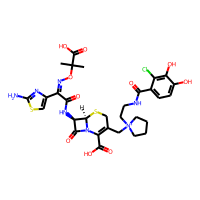

In [17]:
manual_fragments["largest_fragment"] = manual_fragments.ROMol.apply(keep_largest_fragment)
# Time to check it manually
show_df(manual_fragments[["pref_name","SMILES","indication_class","ROMol","largest_fragment"]])

### <a id='toc1_1_4_'></a>[Removing unwanted structures](#toc0_)

After manually checking each pair of figures above, we made a list of structures to be removed. In this list we included ions supplements, when the ion is the active (like Lithium and Aluminium), polymers, ensemble of big structures like omega-3 acids. This was our rationale. The complete table can be found [here](https://docs.google.com/spreadsheets/d/1-0yRHtPiS6LcmKr1WBftUmP90sQdDrgNrG1f1b7HuNg/edit?usp=sharing)

In [18]:
# list of pref_names to be removed
remove_structures = [
"AMMONIUM LACTATE",
"SEVELAMER",
"MESNA",
"ALUMINUM ACETATE",
"AMIFAMPRIDINE PHOSPHATE",
"LITHIUM CITRATE",
"SEVELAMER CARBONATE",
"CYSTEAMINE BITARTRATE",
"PINACIDIL",
"LITHIUM CITRATE",
"SULFADIAZINE, SILVER",
"METHYLENE BLUE",
"ACRISORCIN",
"DIMENHYDRINATE",
"BUTORPHANOL TARTRATE",
"OMEGA-3-CARBOXYLIC ACIDS",
"CEFIDEROCOL SULFATE TOSYLATE",
"GENTAMICIN SULFATE"
]

Before removing unwanted structures:  359
After removing unwanted structures:  341



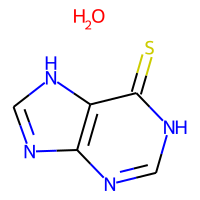
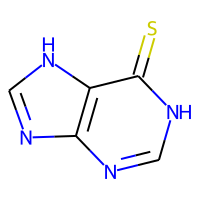
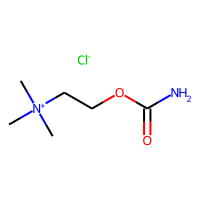
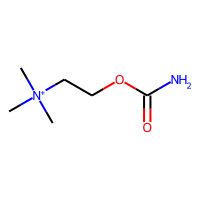
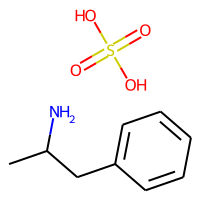
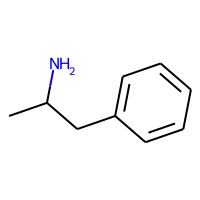
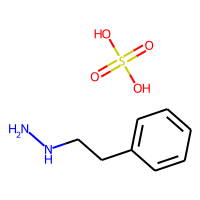
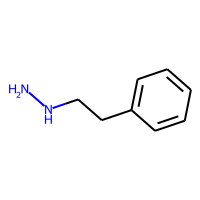
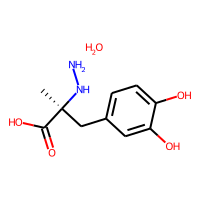
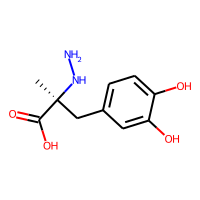
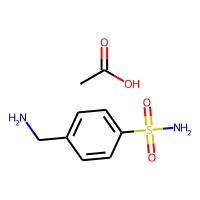
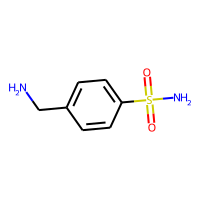
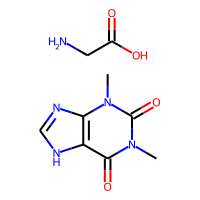
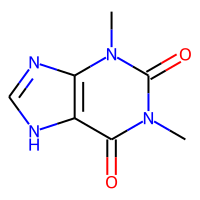
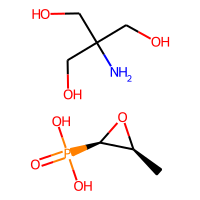
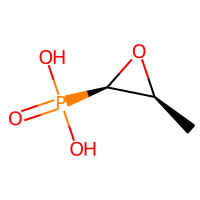
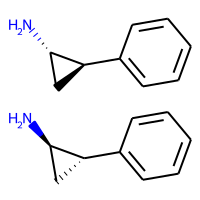
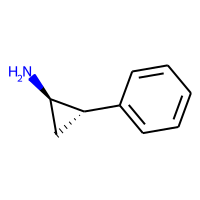
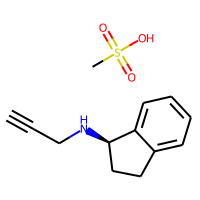
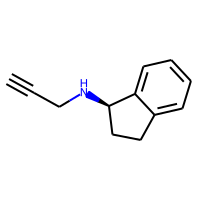

In [19]:
print("Before removing unwanted structures: ",manual_fragments.shape[0])
manual_fragments = manual_fragments[~manual_fragments["pref_name"].isin(remove_structures)]
print("After removing unwanted structures: ",manual_fragments.shape[0])

show_df(manual_fragments.head(10))

### <a id='toc1_1_5_'></a>[Saving the output](#toc0_)

In [20]:
manual_fragments = manual_fragments.drop(['ROMol', 'largest_fragment'], axis=1)
manual_fragments.to_csv('../data/manual_curated_datasets/curated_fragments.csv', index=False)

In [21]:
session_info.show()